# SIGN LANGUAGE RECOGNITION TESTS

In [1]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import tensorflow
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import main

Loading data

In [2]:
test, train = main.load_data()
X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]
possible_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                                              'T', 'U', 'V', 'W', 'X', 'Y']

Preprocessing data for knn and svm

In [14]:
X_train_SVM = main.preprocess_svm(X_train)
X_test_SVM = main.preprocess_svm(X_test)
print(X_train_SVM.shape)

(27455, 81)


Function for training, evaluating and showing results for knn and svm

In [44]:
def evaluate_model(model):
    model.fit(X_train_SVM, y_train)
    y_pred = model.predict(X_test_SVM)
    print(classification_report(y_test, y_pred, target_names=possible_classes))
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(26,26))
    sns.heatmap(conf_matrix, annot=True, xticklabels=possible_classes,
                yticklabels=possible_classes, ax=ax, fmt='g')
    plt.show()

## KNN Tests

Function for iterating through possible k values for each metric

In [45]:
def iterate_through(metric):
    for k in range(3, 10, 2):
        print(f'Evaluating model for k={k}')
        evaluate_model(KNeighborsClassifier(n_neighbors=k, metric=metric))

### Manhattan metric

Evaluating model for k=3
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       0.98      0.95      0.96       432
           C       1.00      1.00      1.00       310
           D       0.97      0.99      0.98       245
           E       0.98      1.00      0.99       498
           F       0.98      1.00      0.99       247
           G       0.99      0.97      0.98       348
           H       0.98      1.00      0.99       436
           I       0.94      1.00      0.97       288
           K       0.90      1.00      0.95       331
           L       1.00      1.00      1.00       209
           M       0.98      0.93      0.95       394
           N       0.91      0.92      0.92       291
           O       1.00      0.92      0.96       246
           P       1.00      0.99      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.96      0.89      0.92       144
  

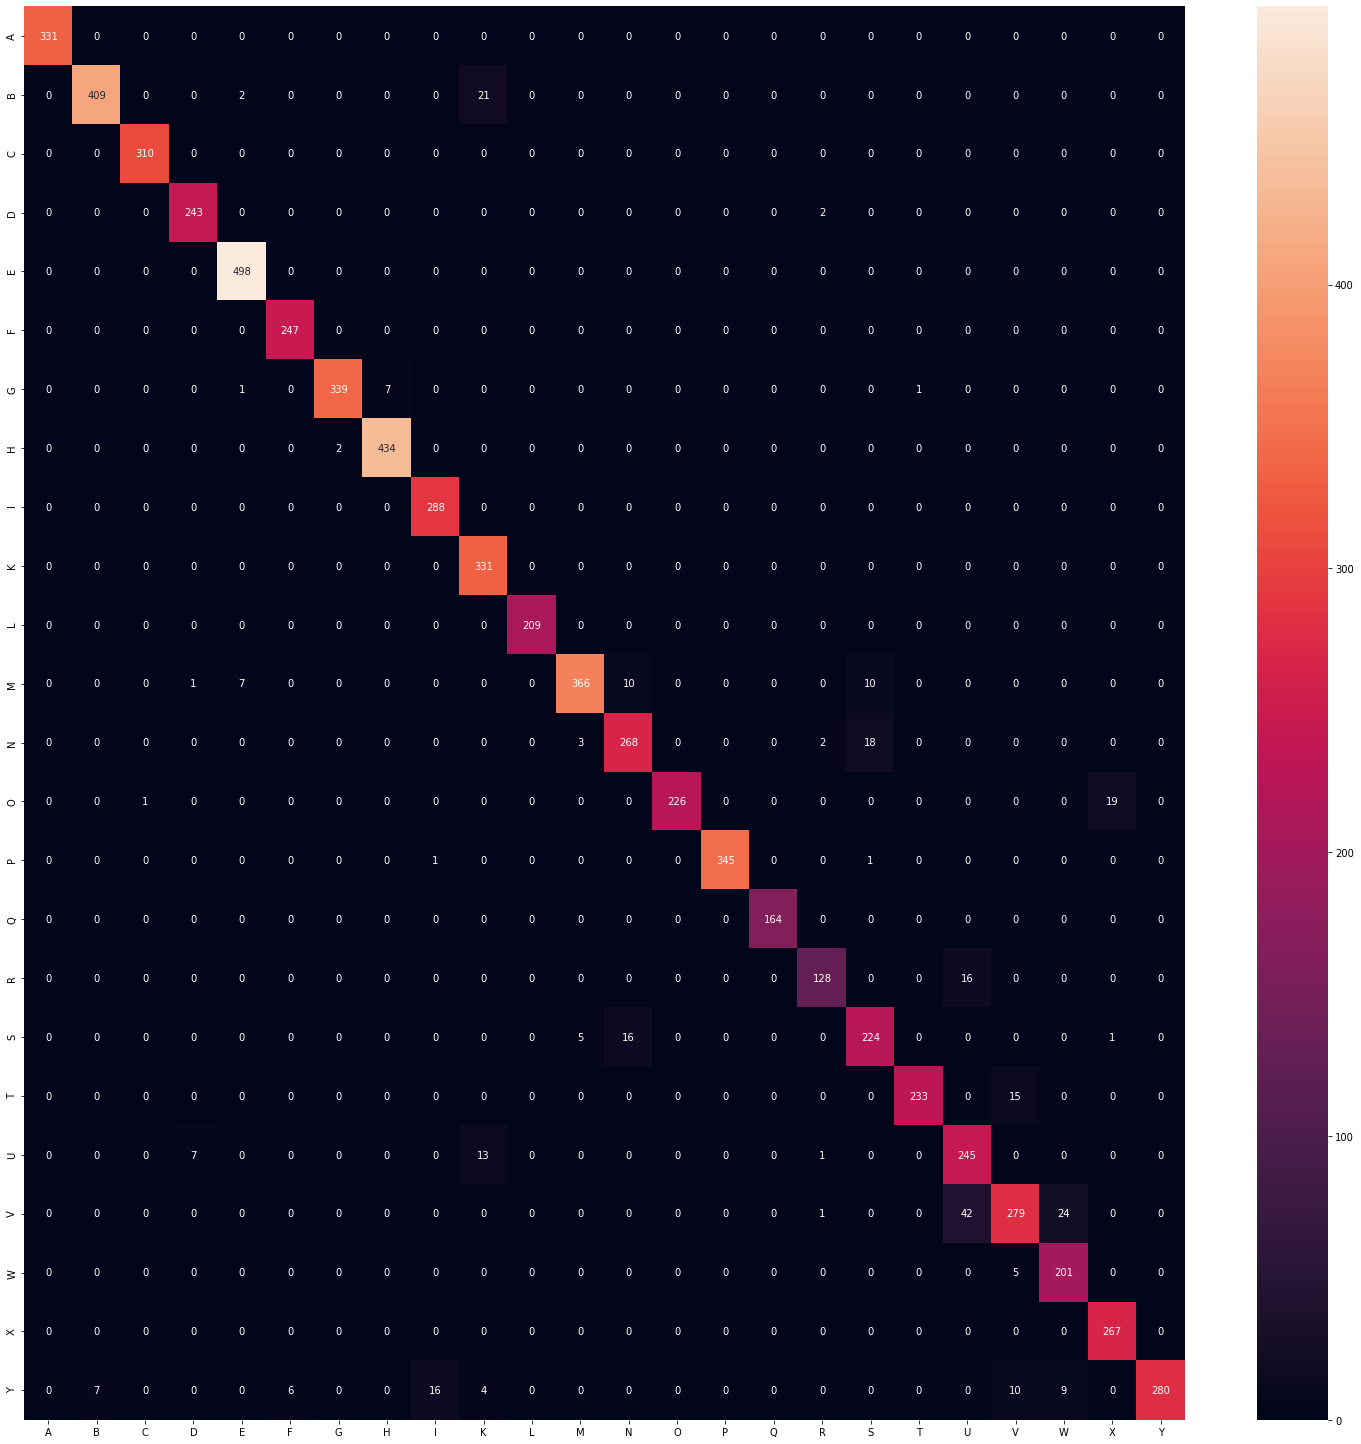

Evaluating model for k=5
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       0.98      0.95      0.97       432
           C       1.00      1.00      1.00       310
           D       0.96      0.99      0.97       245
           E       0.99      1.00      0.99       498
           F       0.97      1.00      0.98       247
           G       0.99      0.98      0.99       348
           H       0.99      0.99      0.99       436
           I       0.94      1.00      0.97       288
           K       0.90      1.00      0.95       331
           L       1.00      1.00      1.00       209
           M       0.98      0.93      0.95       394
           N       0.91      0.92      0.91       291
           O       1.00      0.92      0.96       246
           P       1.00      0.99      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.96      0.89      0.92       144
  

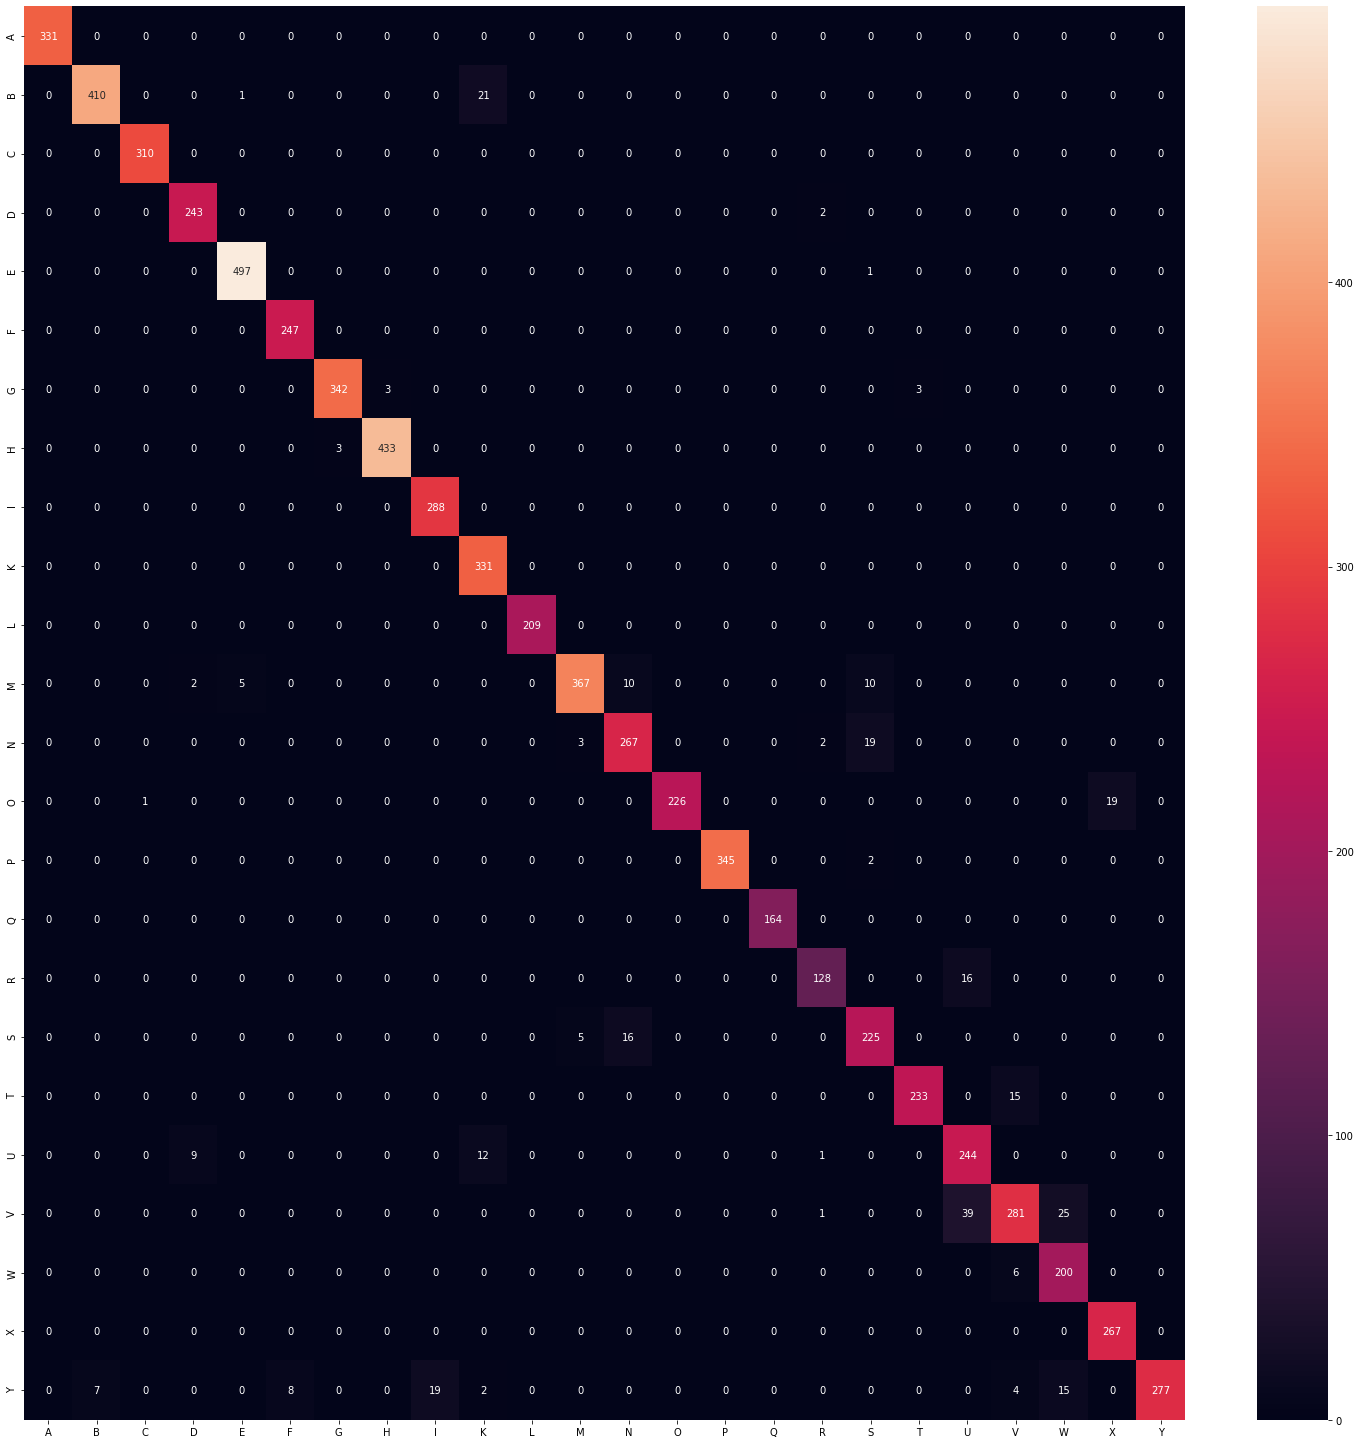

Evaluating model for k=7
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       0.98      0.95      0.96       432
           C       1.00      1.00      1.00       310
           D       0.96      0.99      0.97       245
           E       0.99      1.00      0.99       498
           F       0.97      1.00      0.98       247
           G       0.99      0.98      0.98       348
           H       0.99      0.99      0.99       436
           I       0.92      1.00      0.96       288
           K       0.91      1.00      0.95       331
           L       1.00      1.00      1.00       209
           M       0.97      0.93      0.95       394
           N       0.91      0.92      0.92       291
           O       1.00      0.92      0.96       246
           P       1.00      0.99      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.96      0.89      0.92       144
  

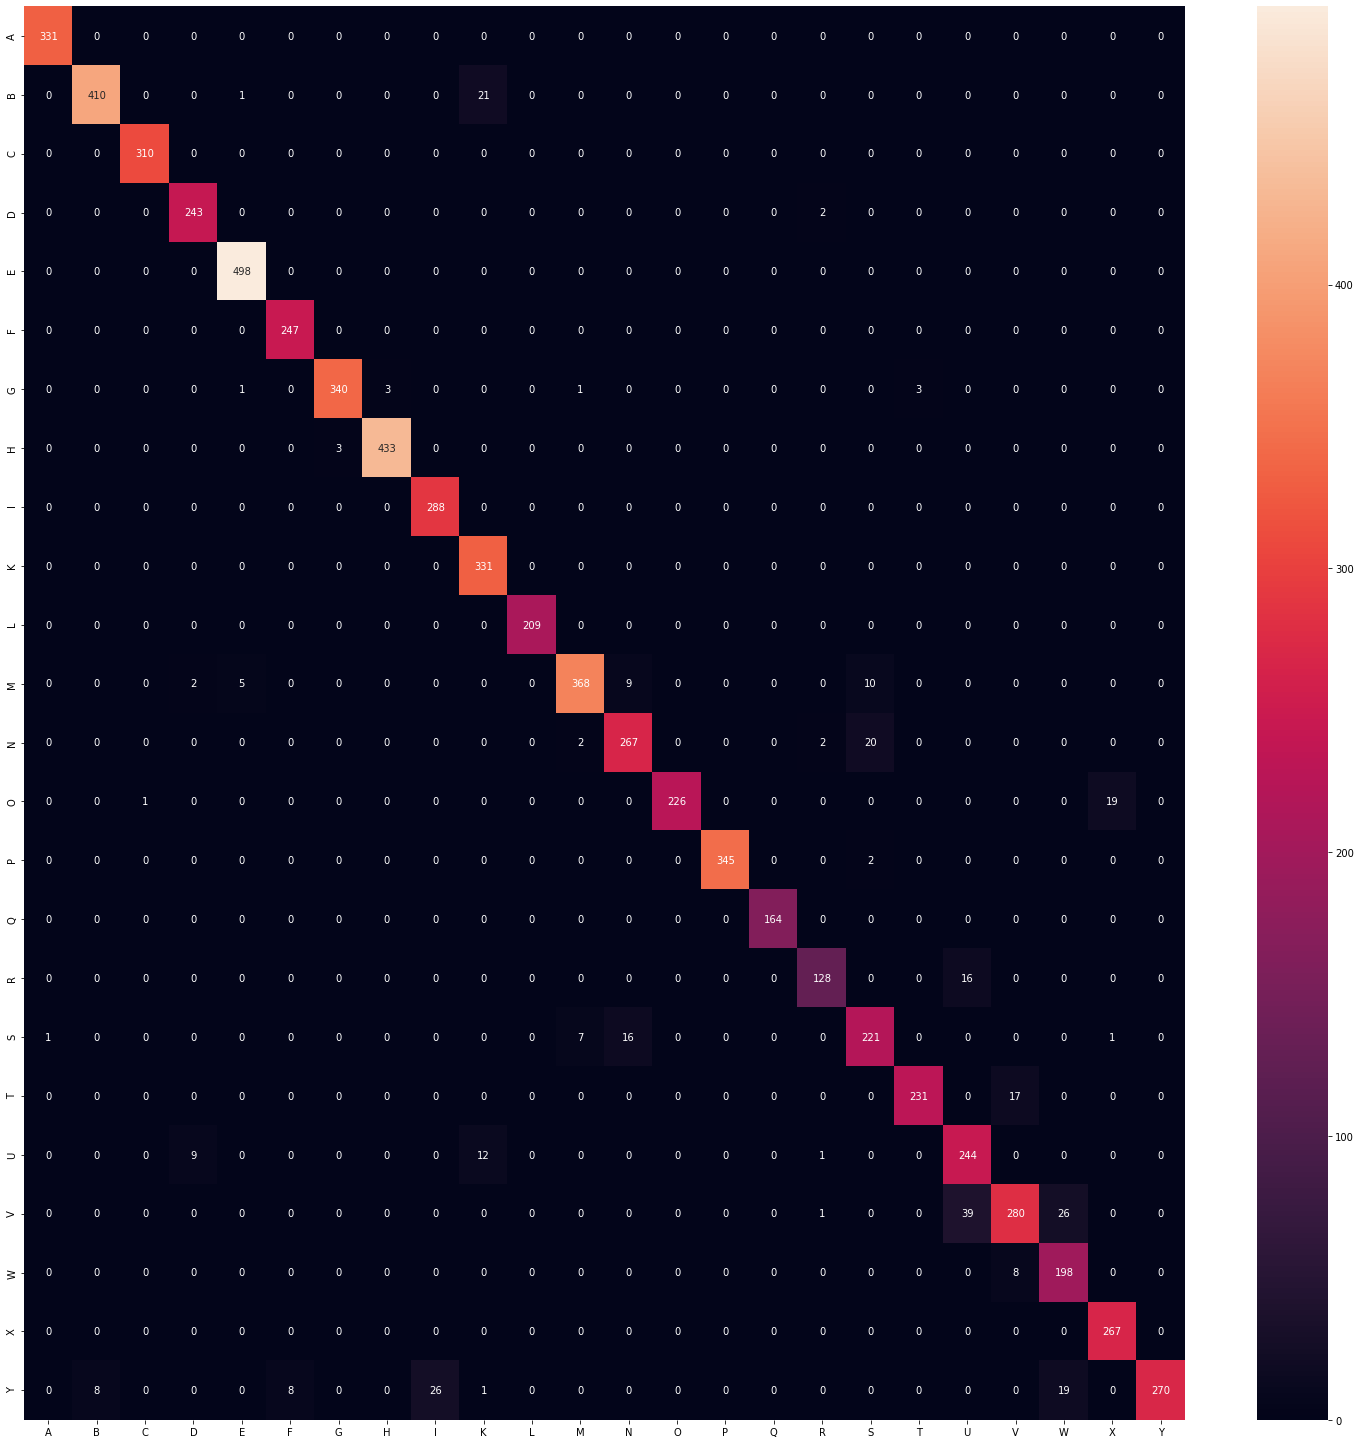

Evaluating model for k=9
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       0.98      0.95      0.96       432
           C       1.00      1.00      1.00       310
           D       0.95      0.99      0.97       245
           E       0.98      1.00      0.99       498
           F       0.97      1.00      0.99       247
           G       0.99      0.97      0.98       348
           H       1.00      0.99      1.00       436
           I       0.91      1.00      0.96       288
           K       0.91      1.00      0.95       331
           L       1.00      1.00      1.00       209
           M       0.97      0.93      0.95       394
           N       0.91      0.92      0.92       291
           O       1.00      0.92      0.96       246
           P       1.00      0.99      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.94      0.89      0.91       144
  

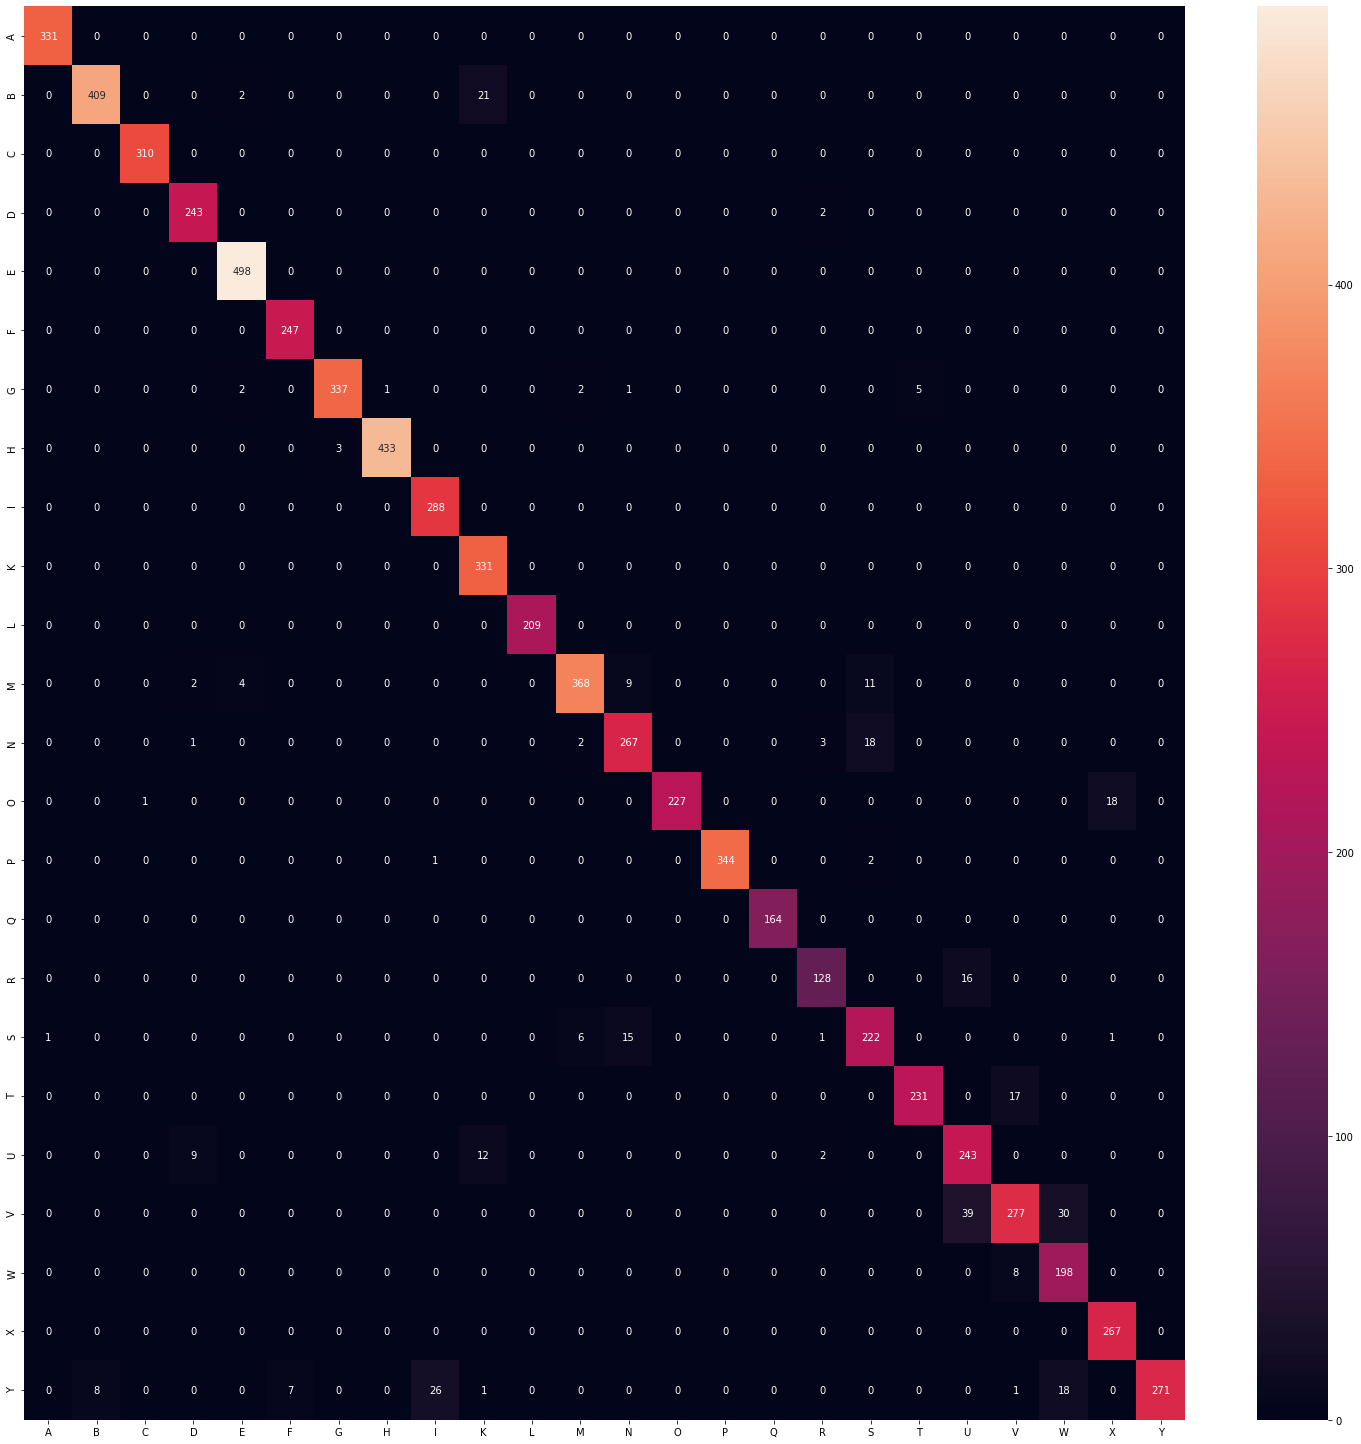

In [46]:
iterate_through('manhattan')

### Euclidean metric

Evaluating model for k=3
              precision    recall  f1-score   support

           A       0.92      1.00      0.96       331
           B       0.98      0.95      0.96       432
           C       1.00      1.00      1.00       310
           D       0.99      1.00      0.99       245
           E       0.98      1.00      0.99       498
           F       1.00      1.00      1.00       247
           G       0.99      0.95      0.97       348
           H       0.96      0.99      0.98       436
           I       0.93      1.00      0.96       288
           K       0.83      1.00      0.90       331
           L       1.00      1.00      1.00       209
           M       0.99      0.89      0.94       394
           N       0.86      0.84      0.85       291
           O       1.00      0.91      0.96       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.85      0.92      0.88       144
  

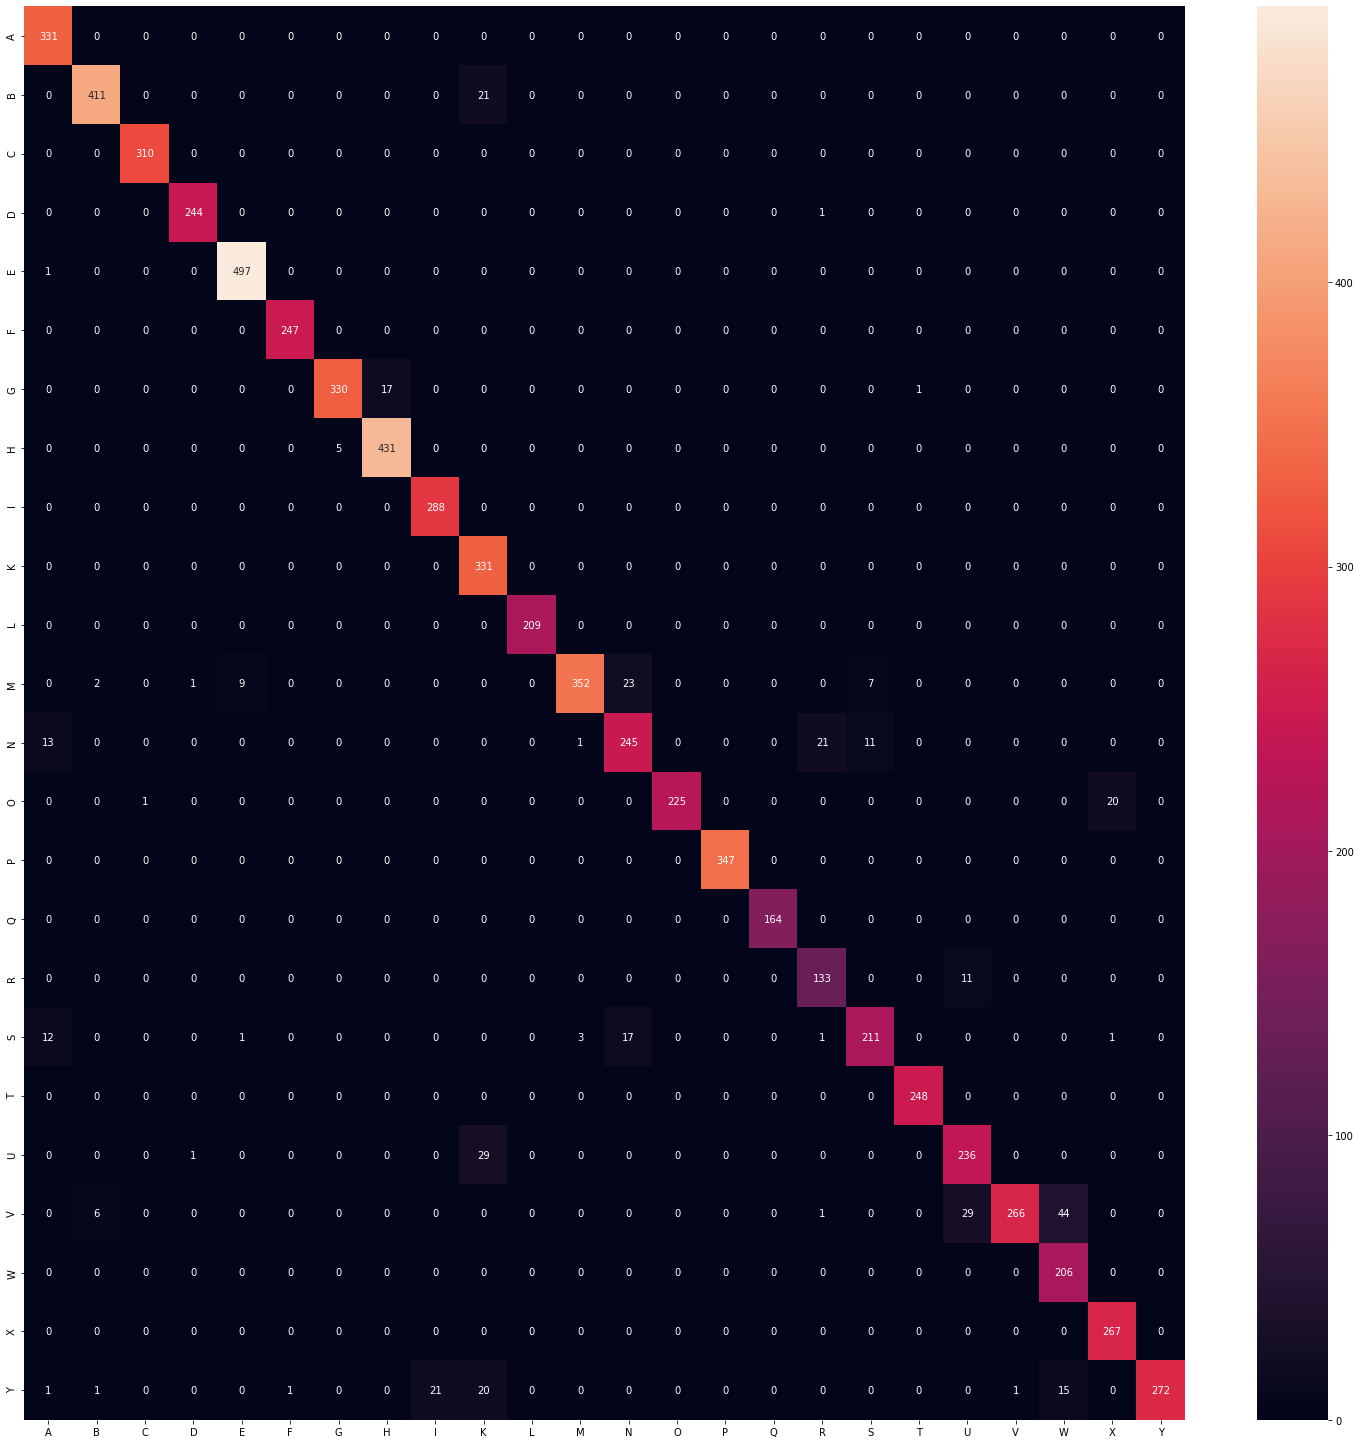

Evaluating model for k=5
              precision    recall  f1-score   support

           A       0.92      1.00      0.96       331
           B       0.98      0.95      0.97       432
           C       1.00      1.00      1.00       310
           D       0.99      1.00      0.99       245
           E       0.97      1.00      0.99       498
           F       1.00      1.00      1.00       247
           G       0.99      0.95      0.97       348
           H       0.97      0.99      0.98       436
           I       0.93      1.00      0.96       288
           K       0.83      1.00      0.91       331
           L       1.00      1.00      1.00       209
           M       0.98      0.90      0.94       394
           N       0.86      0.84      0.85       291
           O       1.00      0.92      0.96       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.81      0.92      0.86       144
  

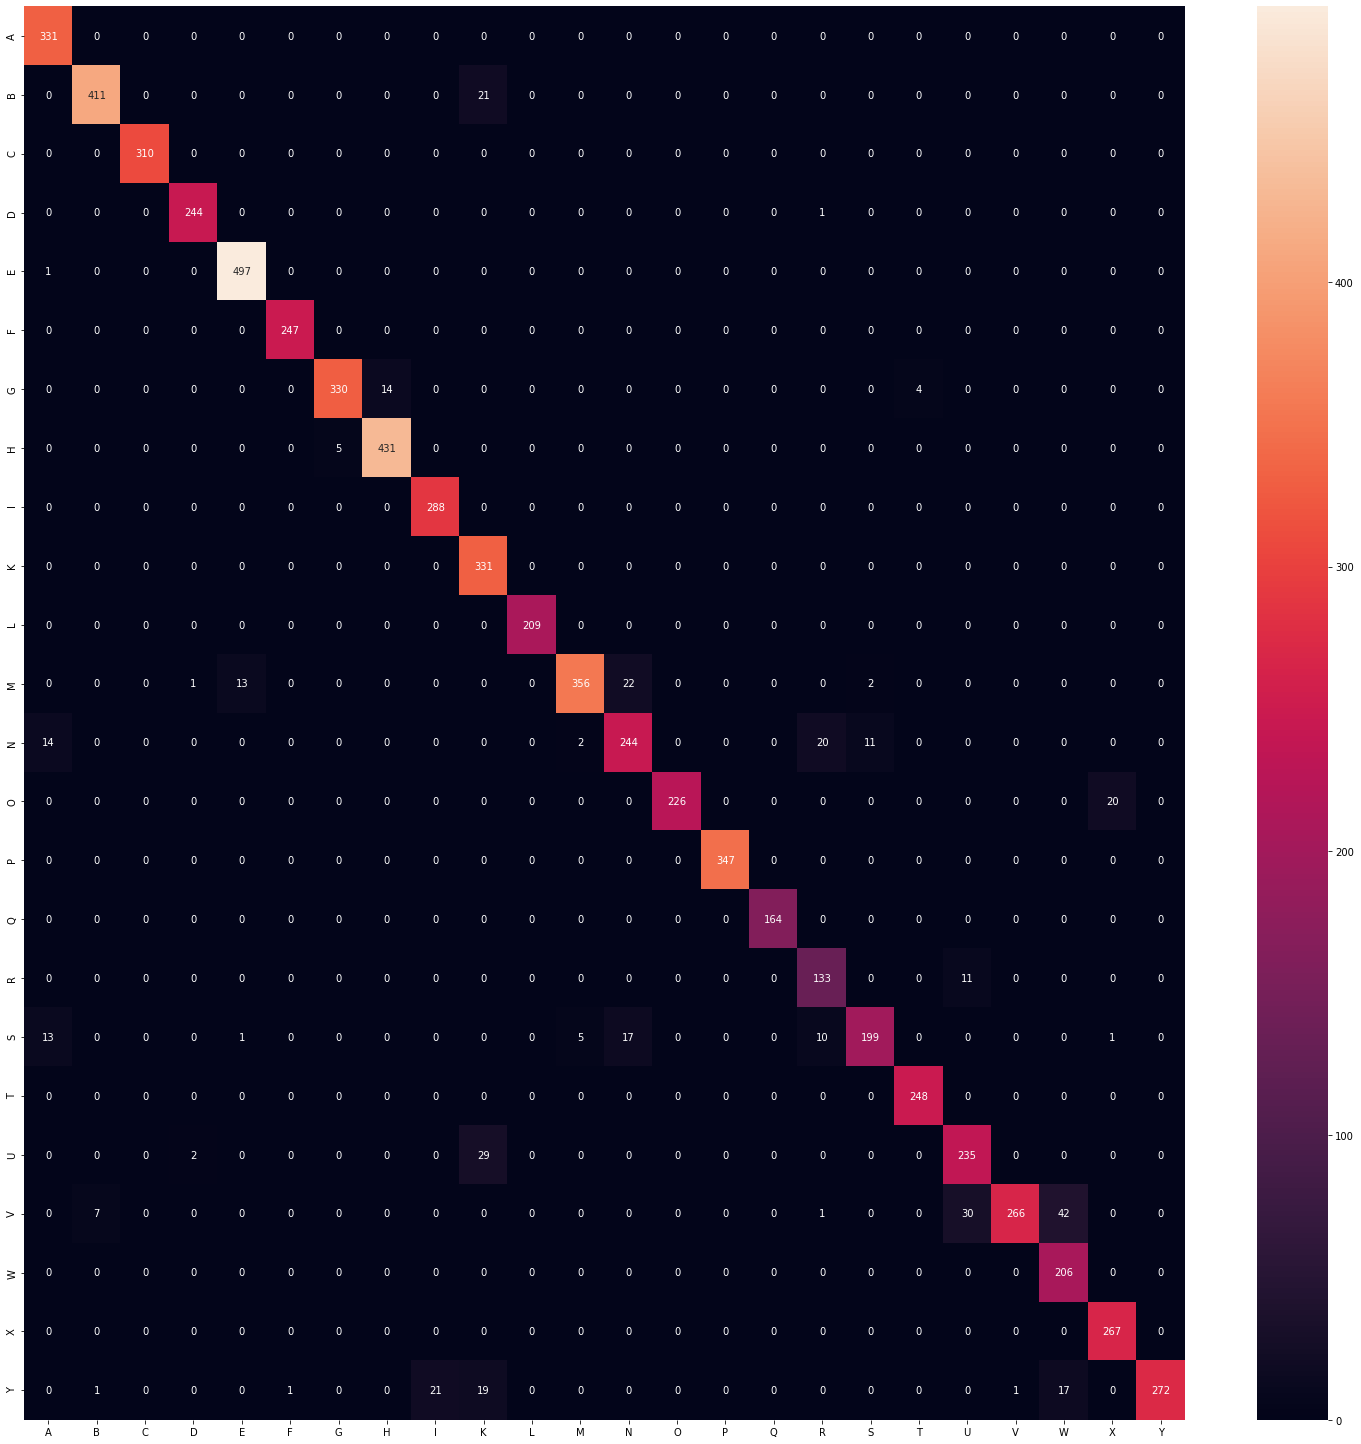

Evaluating model for k=7
              precision    recall  f1-score   support

           A       0.92      1.00      0.96       331
           B       0.98      0.95      0.97       432
           C       1.00      1.00      1.00       310
           D       0.99      1.00      0.99       245
           E       0.97      1.00      0.99       498
           F       1.00      1.00      1.00       247
           G       0.99      0.95      0.96       348
           H       0.98      0.99      0.98       436
           I       0.93      1.00      0.96       288
           K       0.83      1.00      0.91       331
           L       1.00      1.00      1.00       209
           M       0.97      0.93      0.95       394
           N       0.90      0.84      0.86       291
           O       1.00      0.92      0.96       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.79      0.92      0.85       144
  

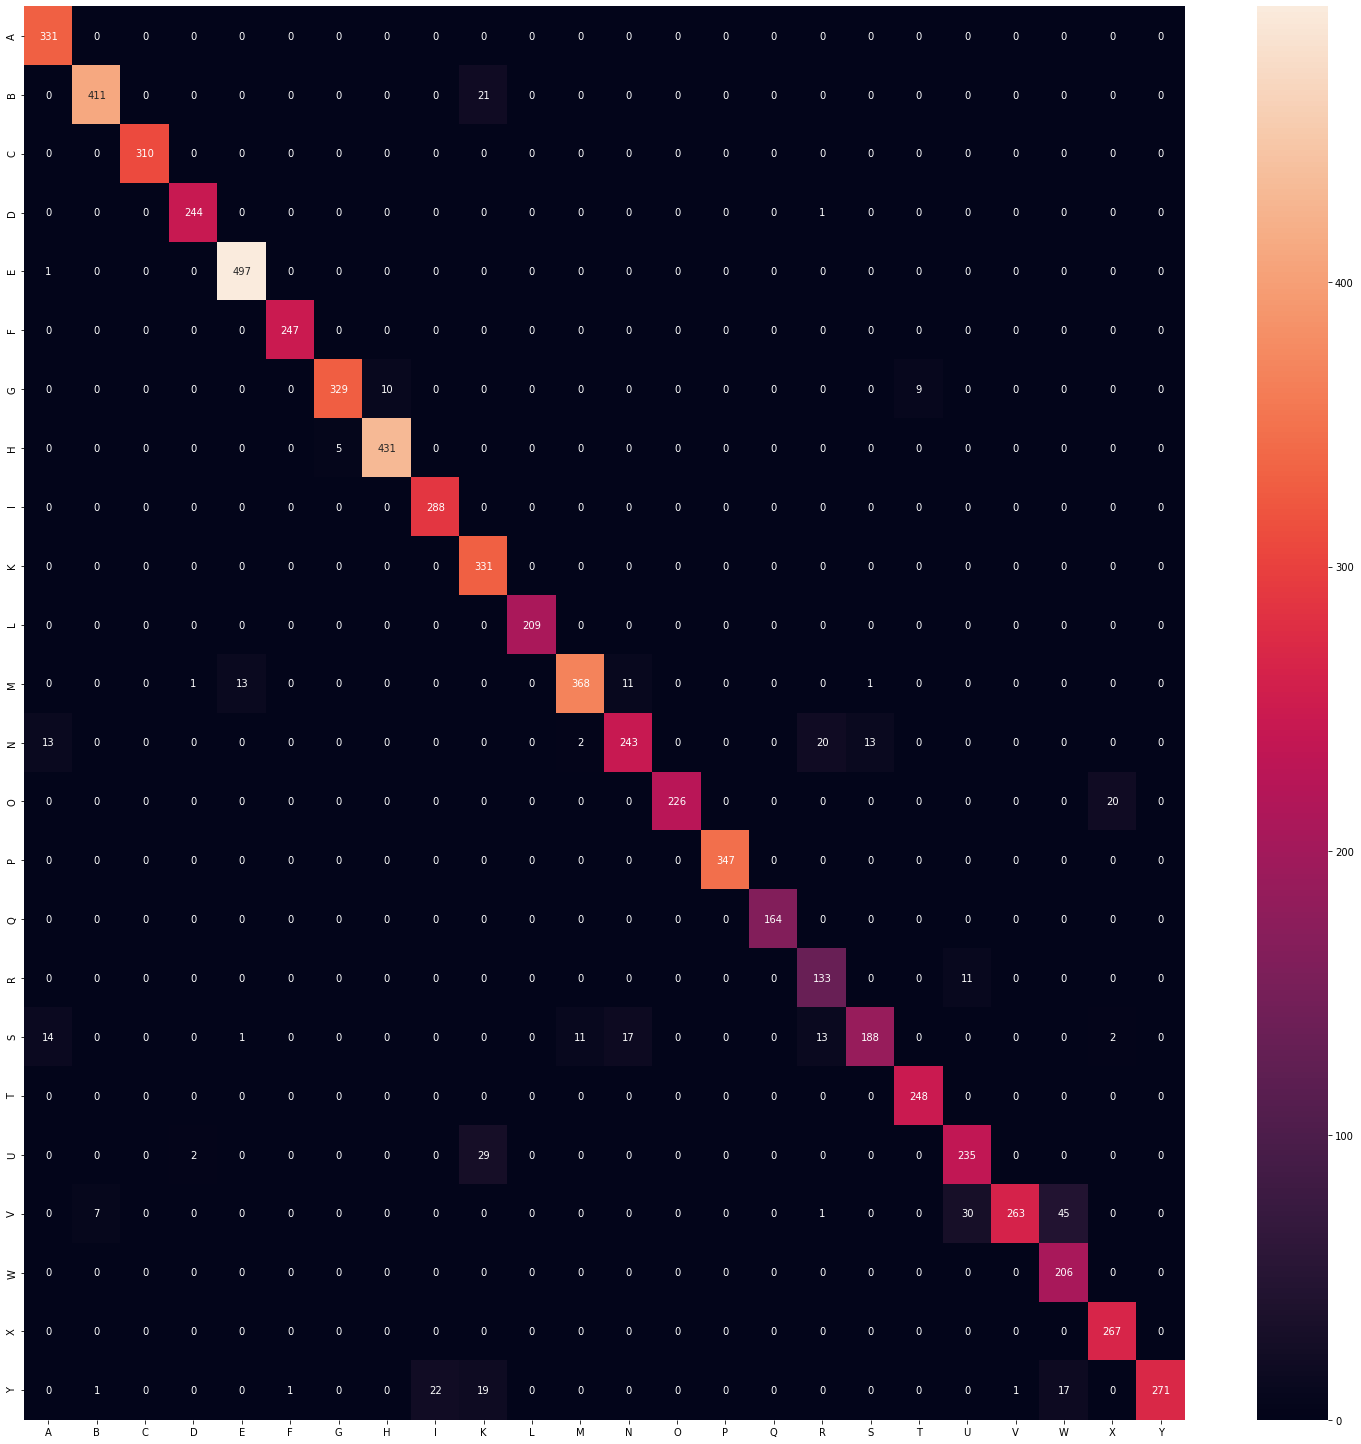

Evaluating model for k=9
              precision    recall  f1-score   support

           A       0.92      1.00      0.96       331
           B       0.98      0.95      0.96       432
           C       1.00      1.00      1.00       310
           D       0.98      1.00      0.99       245
           E       0.98      1.00      0.99       498
           F       1.00      1.00      1.00       247
           G       0.99      0.95      0.96       348
           H       0.98      0.99      0.98       436
           I       0.93      1.00      0.96       288
           K       0.83      1.00      0.91       331
           L       1.00      1.00      1.00       209
           M       0.96      0.93      0.94       394
           N       0.89      0.83      0.86       291
           O       1.00      0.92      0.96       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.82      0.93      0.87       144
  

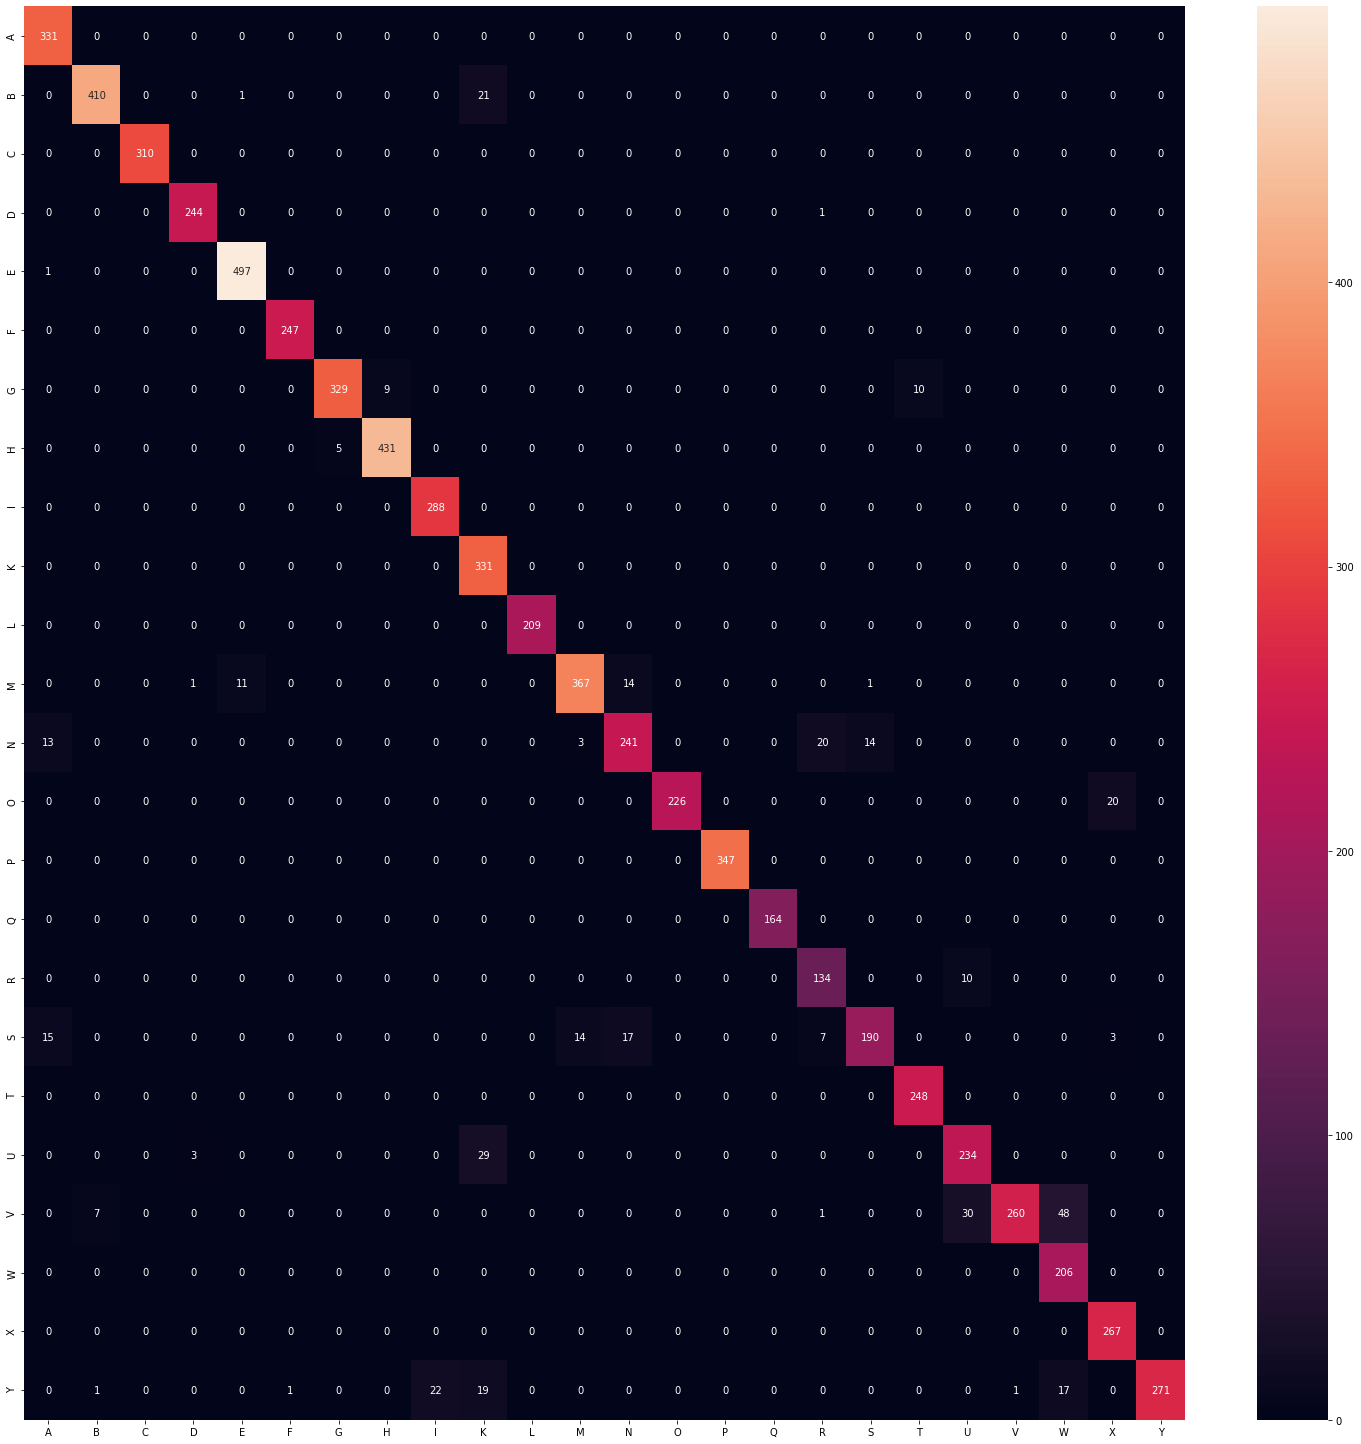

In [59]:
iterate_through('euclidean')

### Chebyshev metric

Evaluating model for k=3
              precision    recall  f1-score   support

           A       0.76      0.96      0.85       331
           B       0.88      0.86      0.87       432
           C       0.99      0.89      0.94       310
           D       0.65      0.92      0.76       245
           E       0.87      0.95      0.91       498
           F       0.90      0.96      0.93       247
           G       0.87      0.87      0.87       348
           H       0.91      0.88      0.89       436
           I       0.87      0.84      0.86       288
           K       0.79      0.76      0.78       331
           L       0.99      1.00      1.00       209
           M       0.79      0.72      0.75       394
           N       0.76      0.67      0.71       291
           O       0.98      0.79      0.88       246
           P       0.96      0.92      0.94       347
           Q       0.96      0.91      0.93       164
           R       0.54      0.94      0.68       144
  

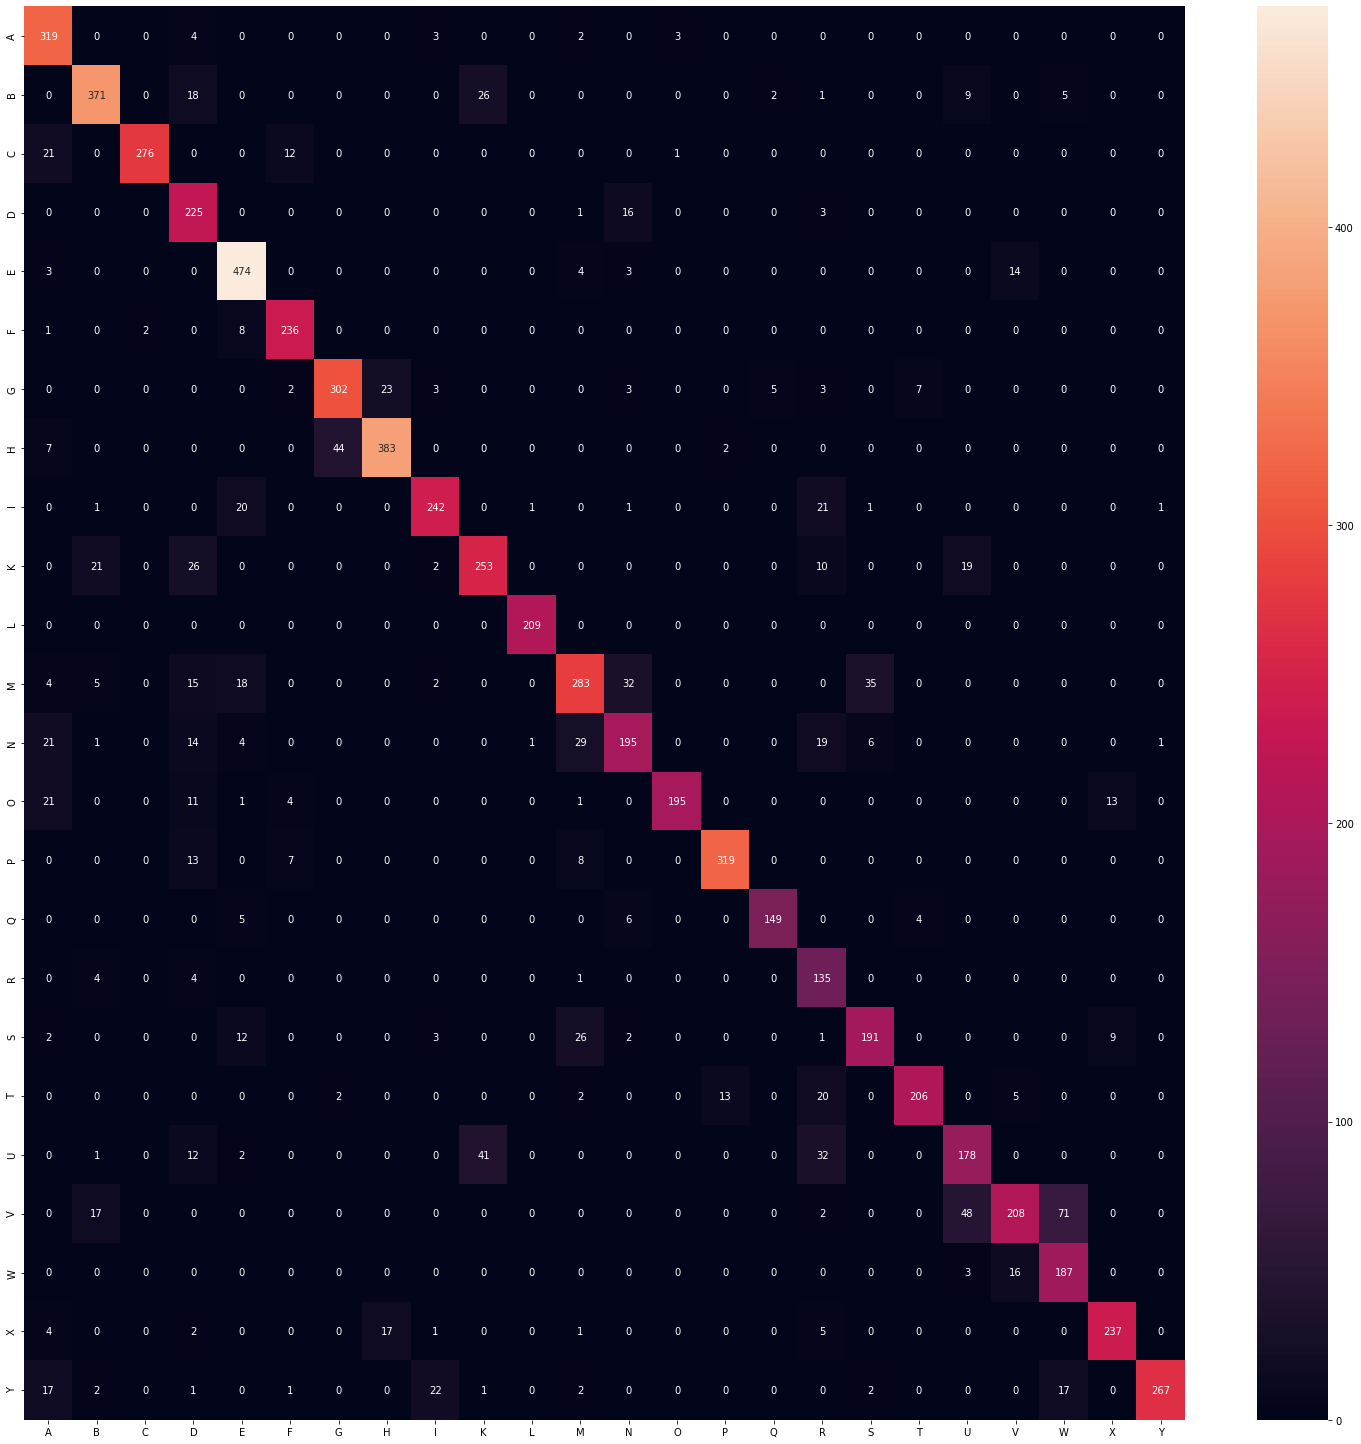

Evaluating model for k=5
              precision    recall  f1-score   support

           A       0.78      0.95      0.86       331
           B       0.88      0.86      0.87       432
           C       0.99      0.90      0.94       310
           D       0.64      0.91      0.75       245
           E       0.84      0.94      0.89       498
           F       0.94      0.96      0.95       247
           G       0.87      0.88      0.87       348
           H       0.91      0.88      0.89       436
           I       0.82      0.81      0.82       288
           K       0.77      0.70      0.74       331
           L       0.99      1.00      1.00       209
           M       0.77      0.75      0.76       394
           N       0.77      0.66      0.71       291
           O       0.98      0.76      0.86       246
           P       0.96      0.92      0.94       347
           Q       0.94      0.89      0.92       164
           R       0.56      0.94      0.70       144
  

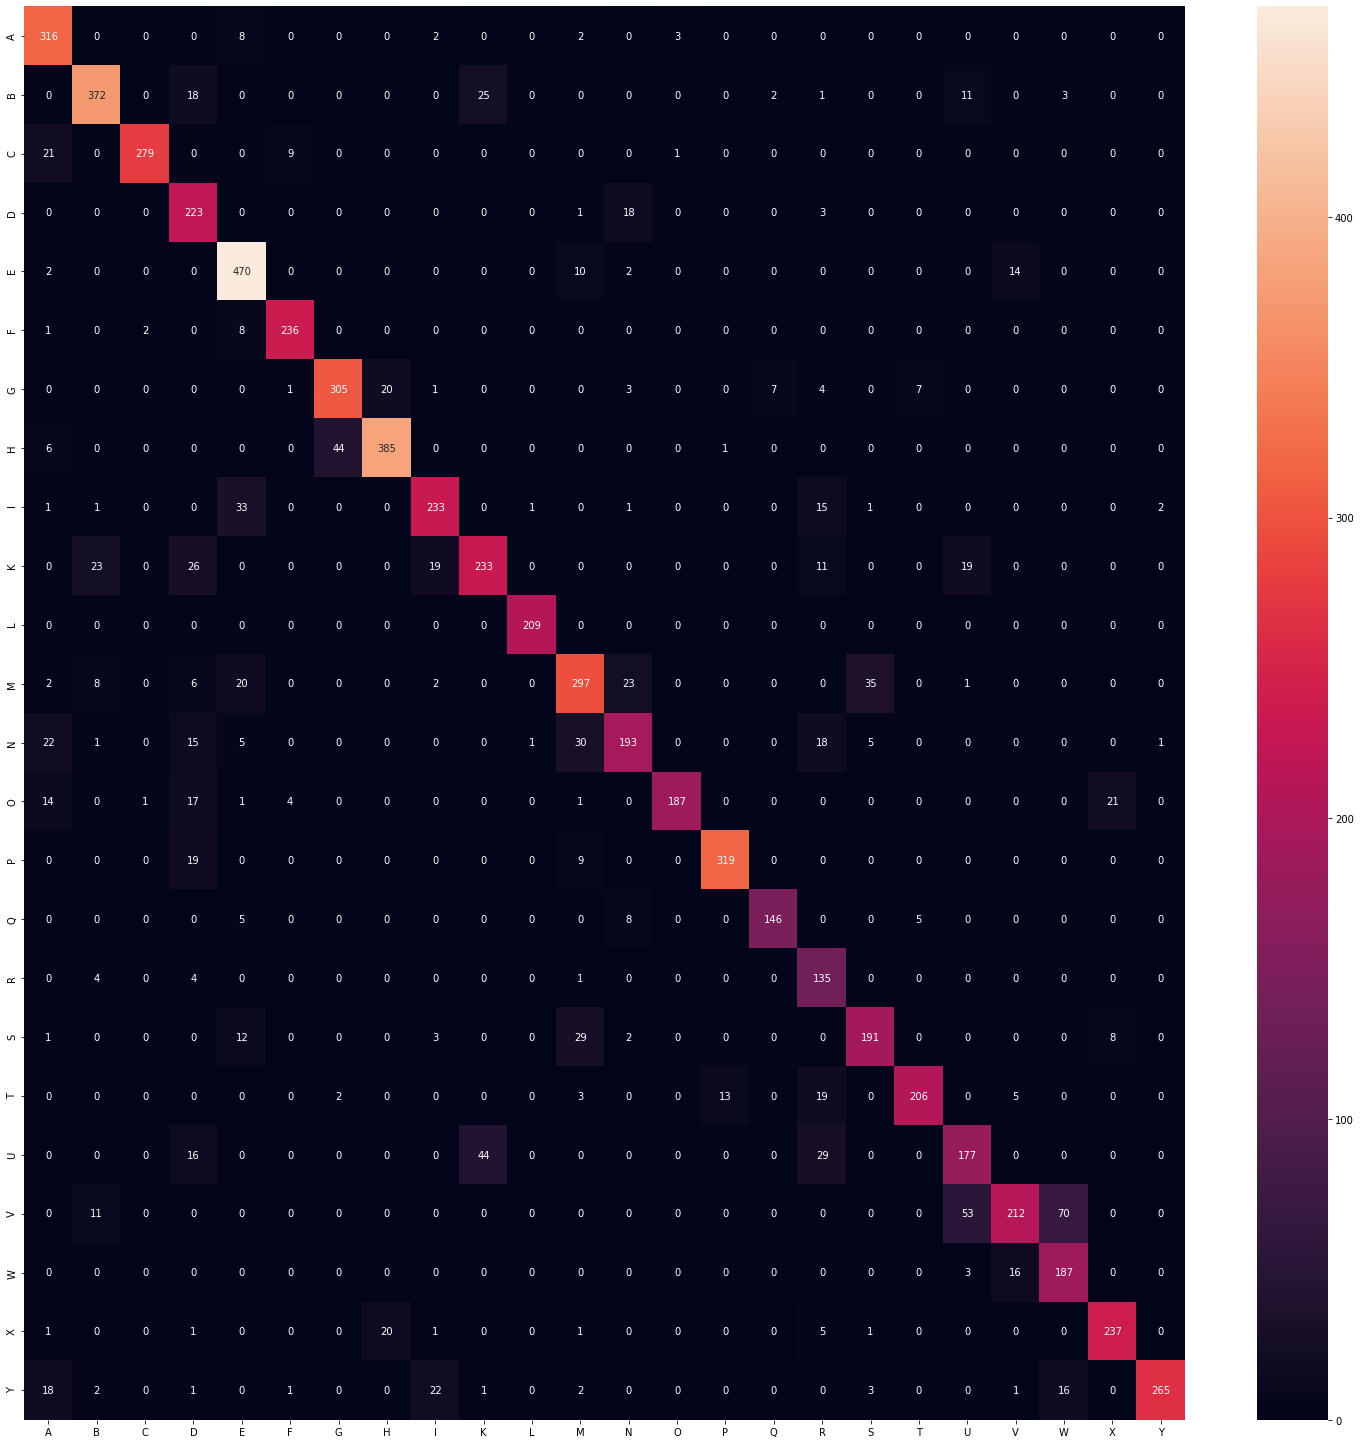

Evaluating model for k=7
              precision    recall  f1-score   support

           A       0.77      0.95      0.85       331
           B       0.87      0.86      0.86       432
           C       0.99      0.89      0.94       310
           D       0.63      0.91      0.74       245
           E       0.83      0.95      0.88       498
           F       0.91      0.95      0.93       247
           G       0.88      0.88      0.88       348
           H       0.91      0.89      0.90       436
           I       0.84      0.82      0.83       288
           K       0.77      0.67      0.72       331
           L       1.00      1.00      1.00       209
           M       0.78      0.77      0.77       394
           N       0.77      0.66      0.71       291
           O       0.97      0.76      0.85       246
           P       0.97      0.94      0.96       347
           Q       0.93      0.89      0.91       164
           R       0.55      0.91      0.69       144
  

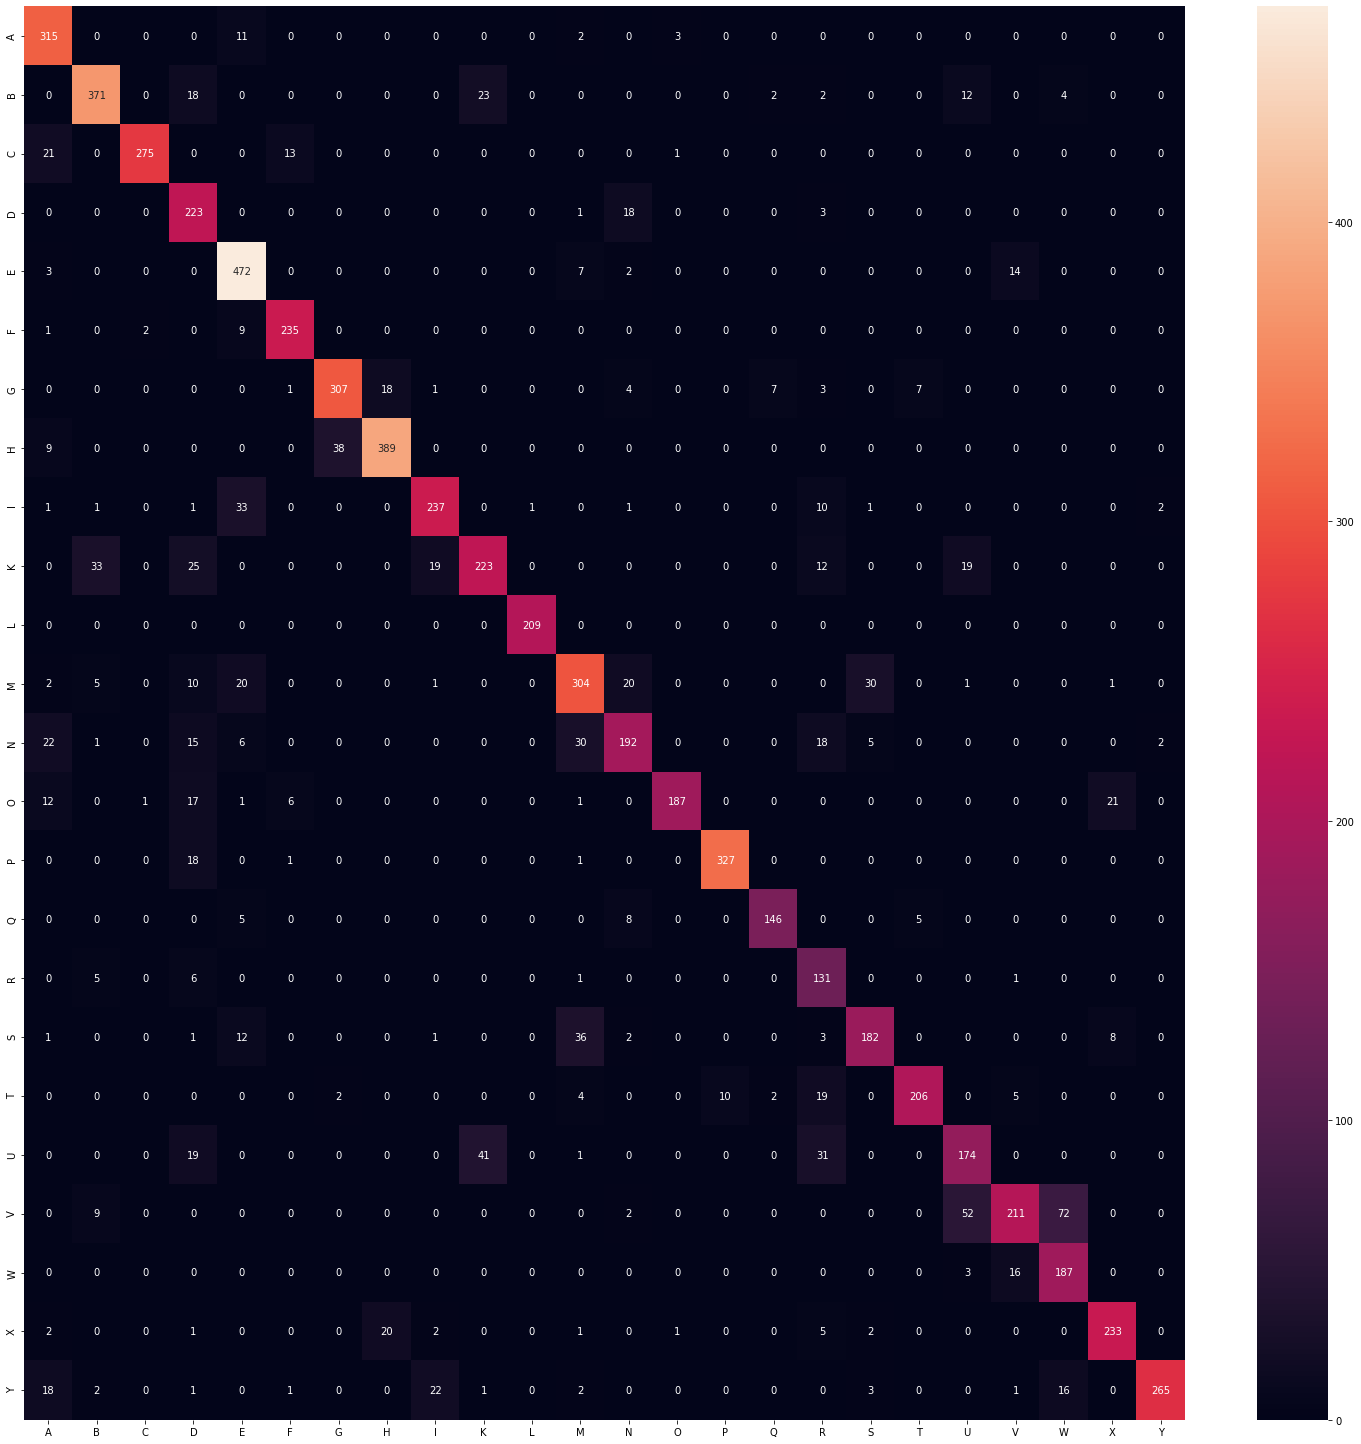

Evaluating model for k=9
              precision    recall  f1-score   support

           A       0.75      0.95      0.84       331
           B       0.88      0.85      0.86       432
           C       0.99      0.88      0.93       310
           D       0.63      0.92      0.75       245
           E       0.83      0.93      0.88       498
           F       0.91      0.95      0.93       247
           G       0.88      0.89      0.88       348
           H       0.91      0.88      0.89       436
           I       0.84      0.84      0.84       288
           K       0.75      0.68      0.72       331
           L       1.00      1.00      1.00       209
           M       0.76      0.77      0.76       394
           N       0.78      0.67      0.72       291
           O       0.96      0.76      0.85       246
           P       0.97      0.95      0.96       347
           Q       0.94      0.91      0.93       164
           R       0.54      0.90      0.68       144
  

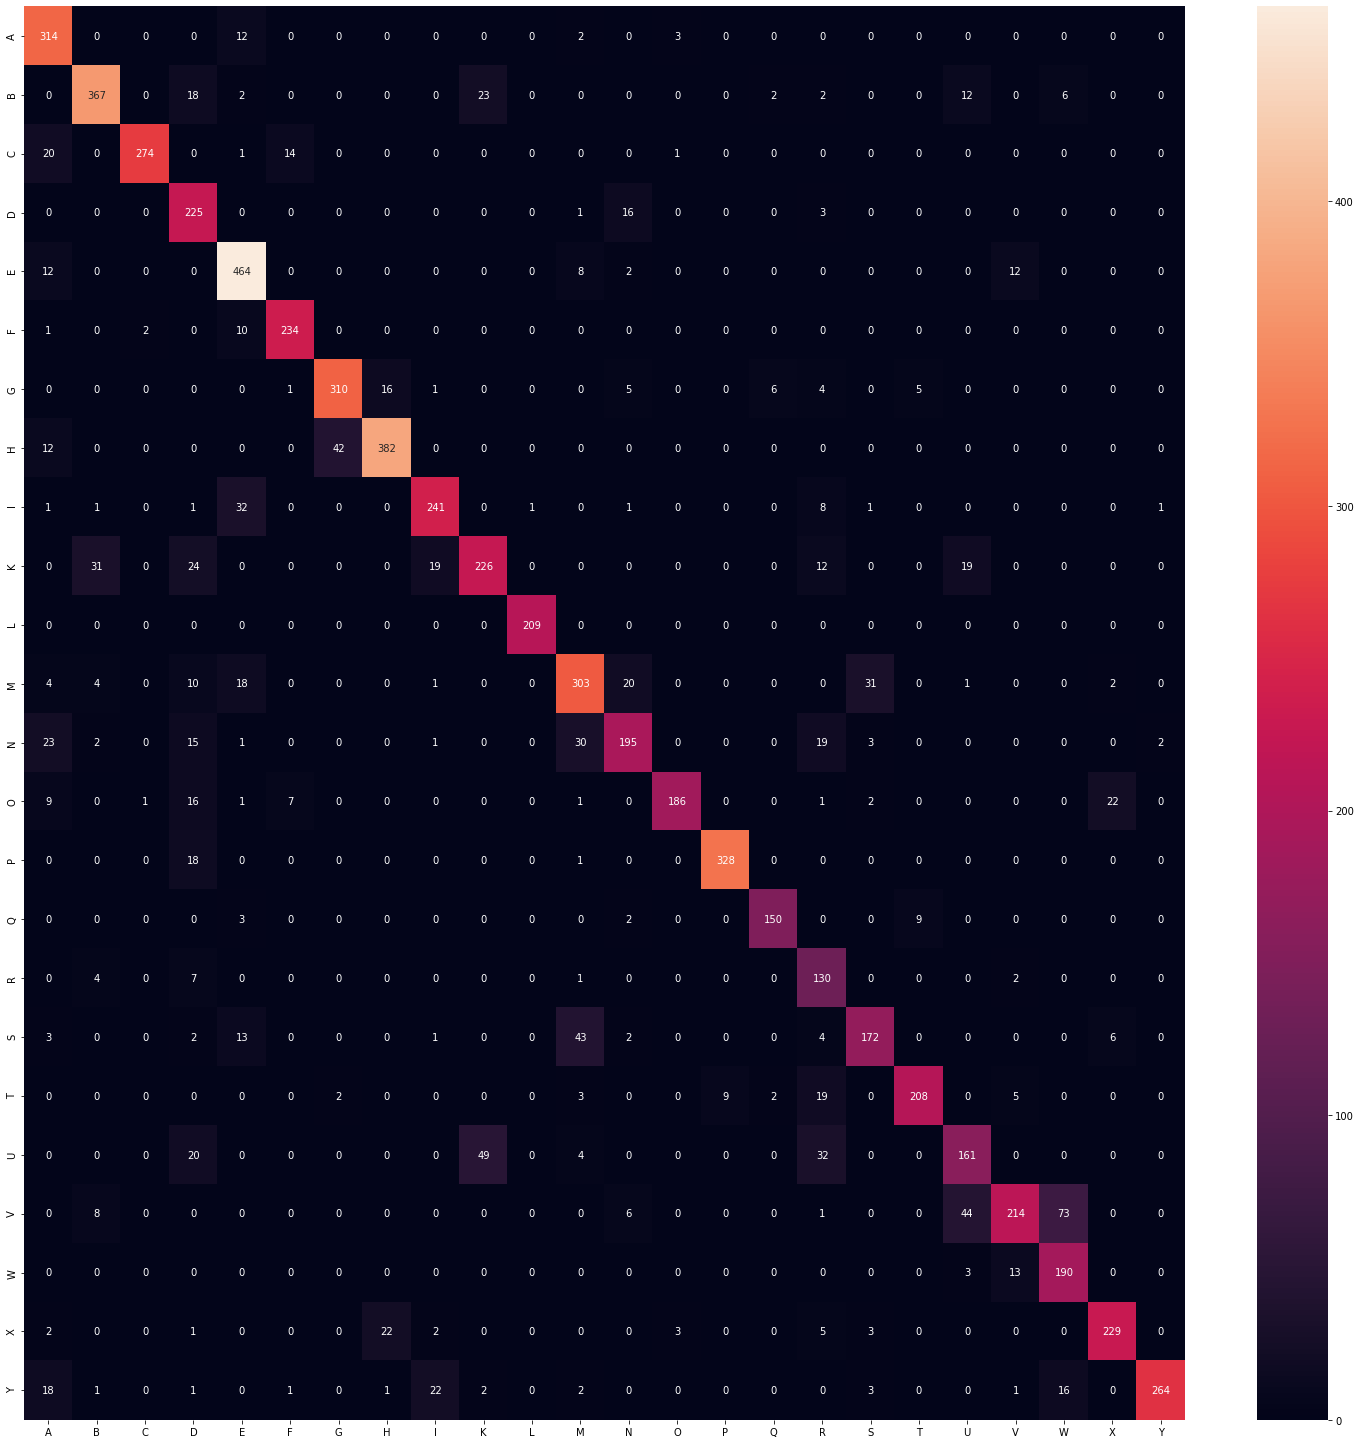

In [60]:
iterate_through('chebyshev')

### Mahalanobis metric

Evaluating model for k=3


d:\sign-language-hand-gesture-recognition\venv_second\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


              precision    recall  f1-score   support

           A       0.82      1.00      0.90       331
           B       0.81      0.94      0.87       432
           C       0.99      1.00      1.00       310
           D       0.78      0.98      0.87       245
           E       0.92      0.91      0.92       498
           F       1.00      0.95      0.98       247
           G       0.97      0.89      0.93       348
           H       0.99      0.94      0.97       436
           I       0.90      1.00      0.95       288
           K       0.84      0.96      0.90       331
           L       1.00      1.00      1.00       209
           M       0.82      0.78      0.80       394
           N       0.88      0.80      0.84       291
           O       0.98      0.83      0.90       246
           P       1.00      0.78      0.88       347
           Q       0.84      1.00      0.91       164
           R       0.73      0.99      0.84       144
           S       0.75    

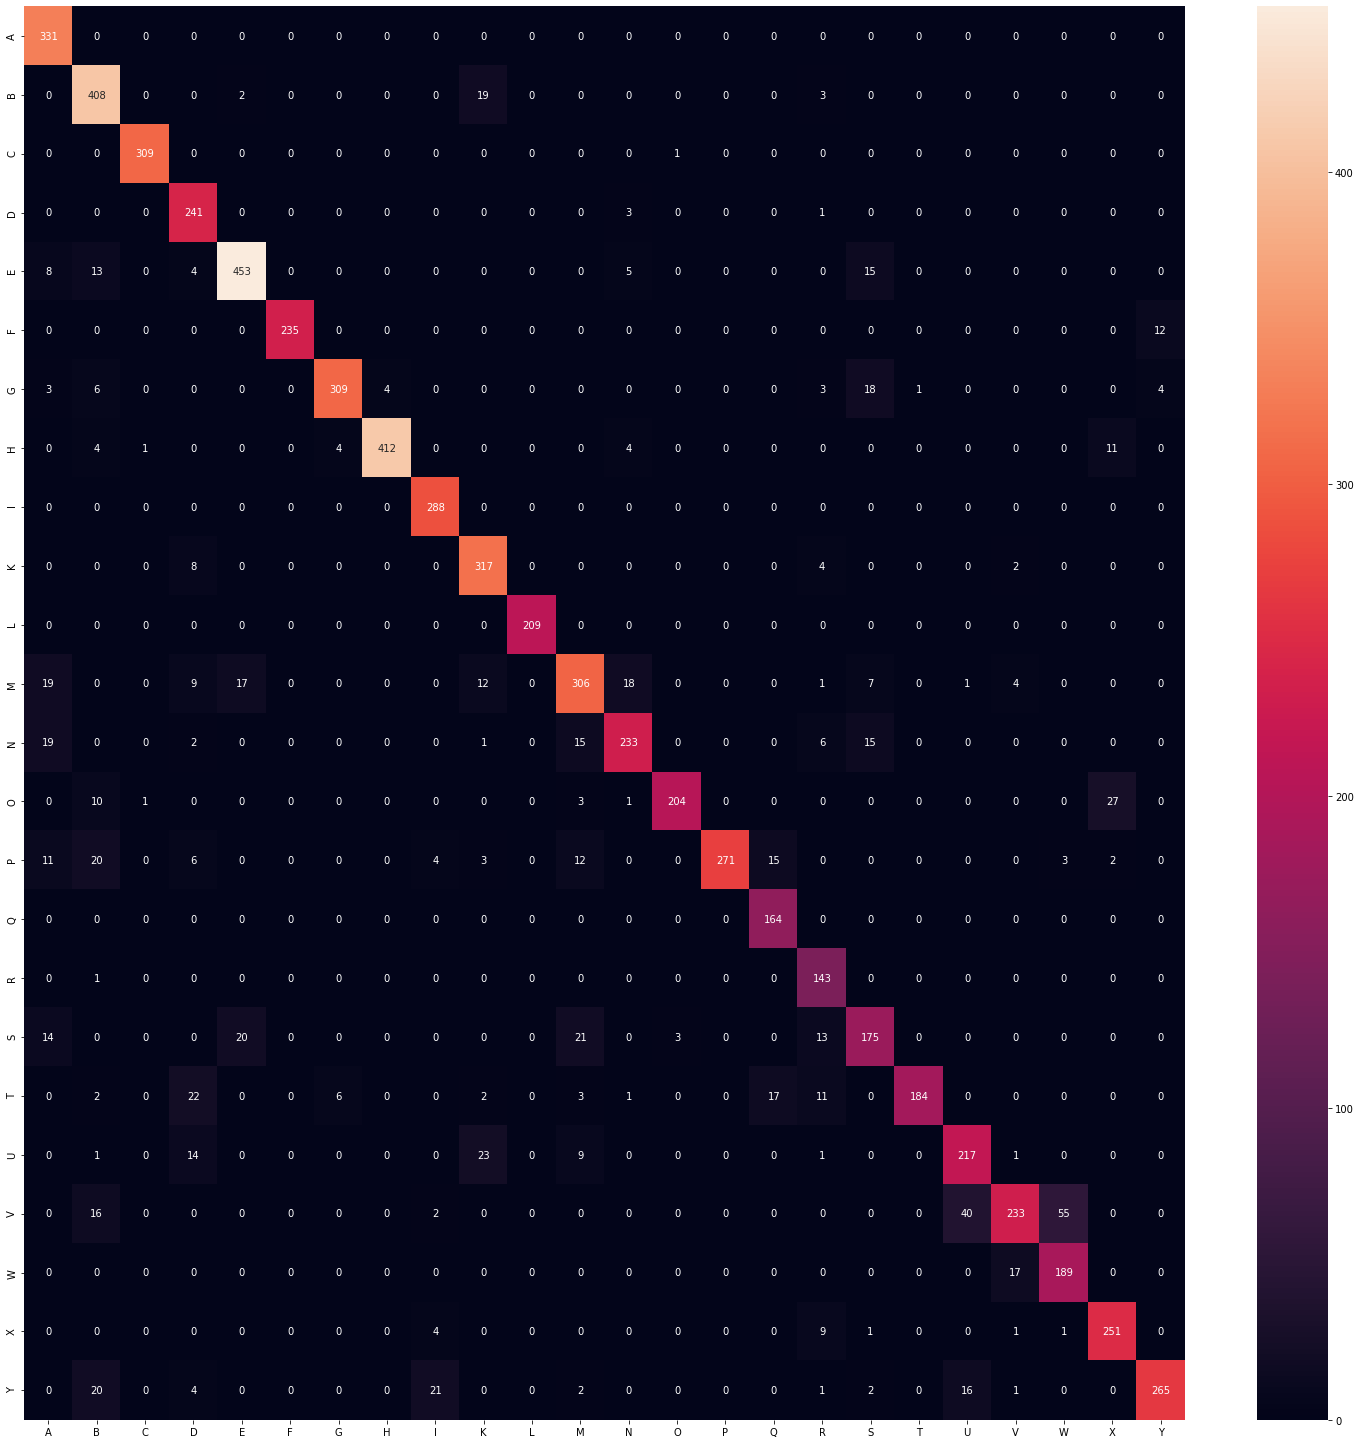

Evaluating model for k=5


d:\sign-language-hand-gesture-recognition\venv_second\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


              precision    recall  f1-score   support

           A       0.81      1.00      0.90       331
           B       0.81      0.94      0.87       432
           C       0.99      1.00      1.00       310
           D       0.76      0.98      0.86       245
           E       0.92      0.89      0.90       498
           F       1.00      0.95      0.98       247
           G       0.97      0.89      0.93       348
           H       0.99      0.95      0.97       436
           I       0.90      1.00      0.95       288
           K       0.85      0.96      0.90       331
           L       1.00      1.00      1.00       209
           M       0.83      0.79      0.81       394
           N       0.88      0.80      0.84       291
           O       0.95      0.82      0.88       246
           P       1.00      0.77      0.87       347
           Q       0.83      1.00      0.91       164
           R       0.70      0.99      0.82       144
           S       0.76    

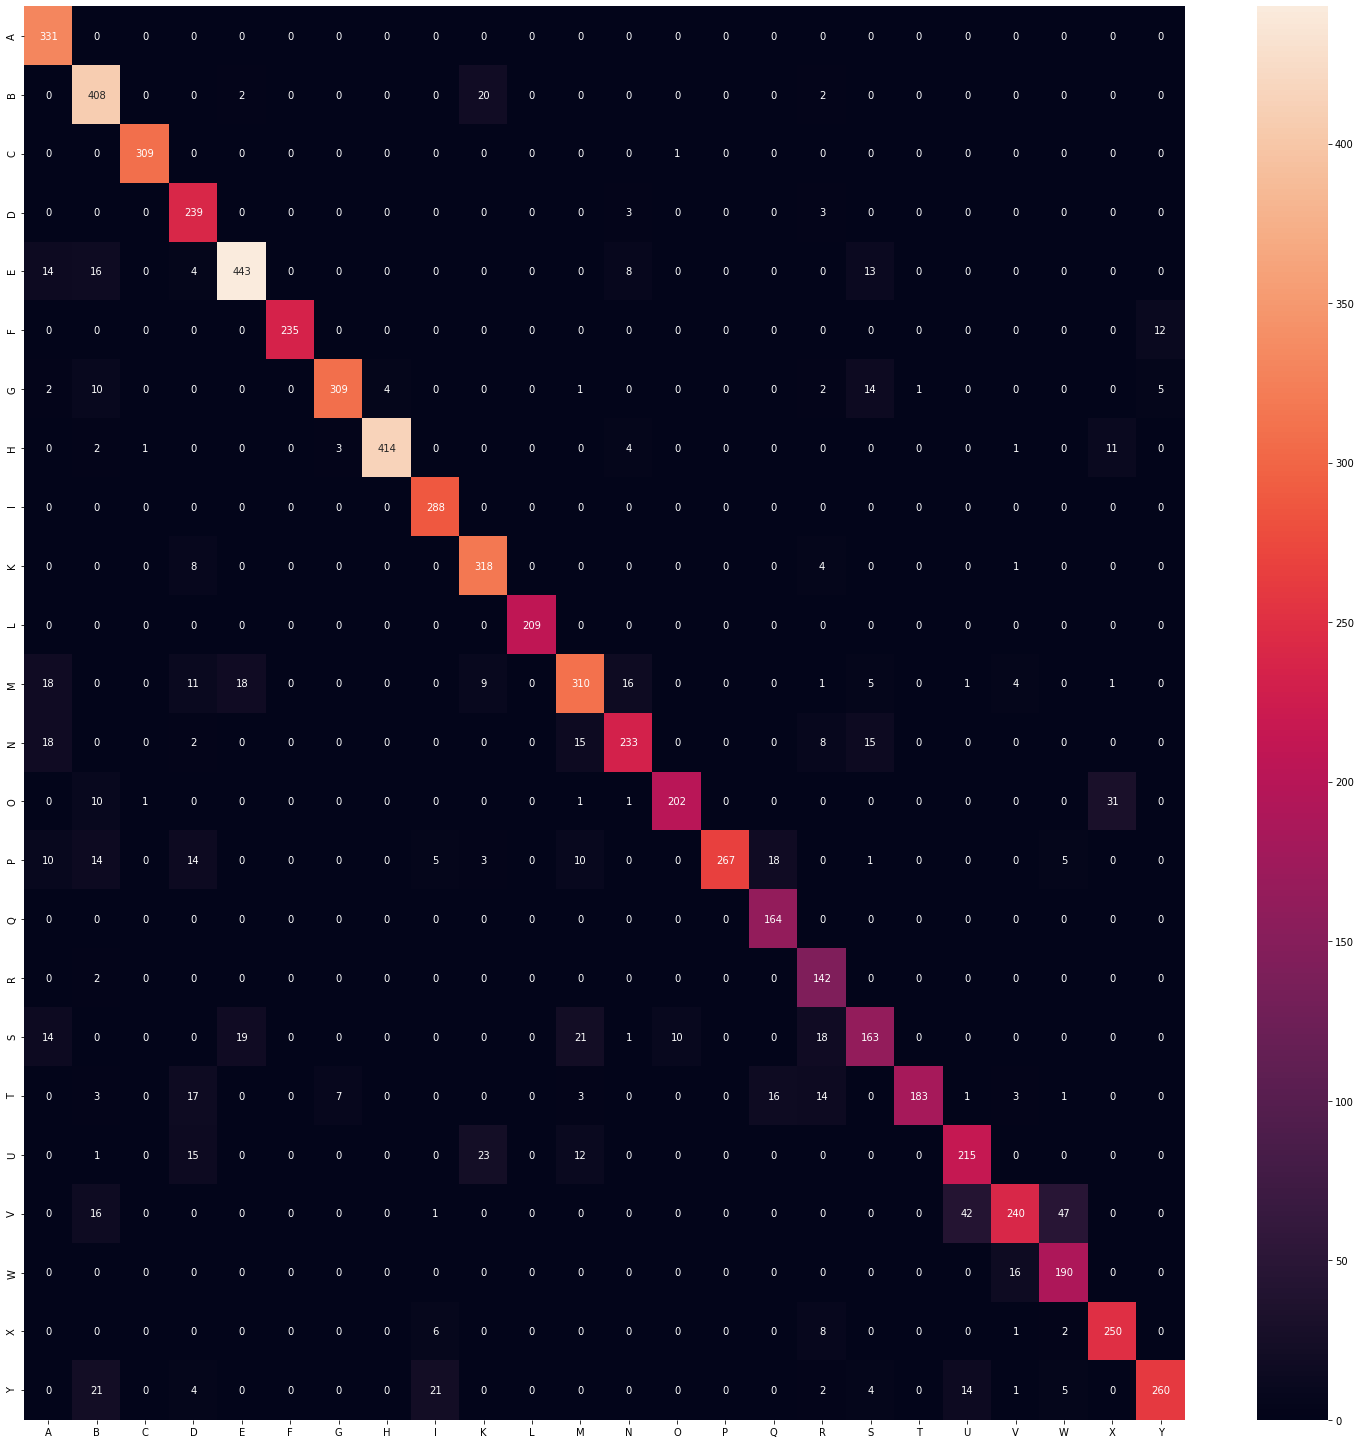

Evaluating model for k=7


d:\sign-language-hand-gesture-recognition\venv_second\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


              precision    recall  f1-score   support

           A       0.82      1.00      0.90       331
           B       0.80      0.95      0.87       432
           C       0.99      1.00      1.00       310
           D       0.77      0.98      0.86       245
           E       0.92      0.88      0.90       498
           F       1.00      0.95      0.97       247
           G       0.97      0.88      0.92       348
           H       0.99      0.95      0.97       436
           I       0.89      1.00      0.94       288
           K       0.86      0.97      0.91       331
           L       1.00      1.00      1.00       209
           M       0.83      0.78      0.81       394
           N       0.84      0.80      0.82       291
           O       0.99      0.82      0.89       246
           P       1.00      0.78      0.88       347
           Q       0.85      1.00      0.92       164
           R       0.69      0.99      0.81       144
           S       0.79    

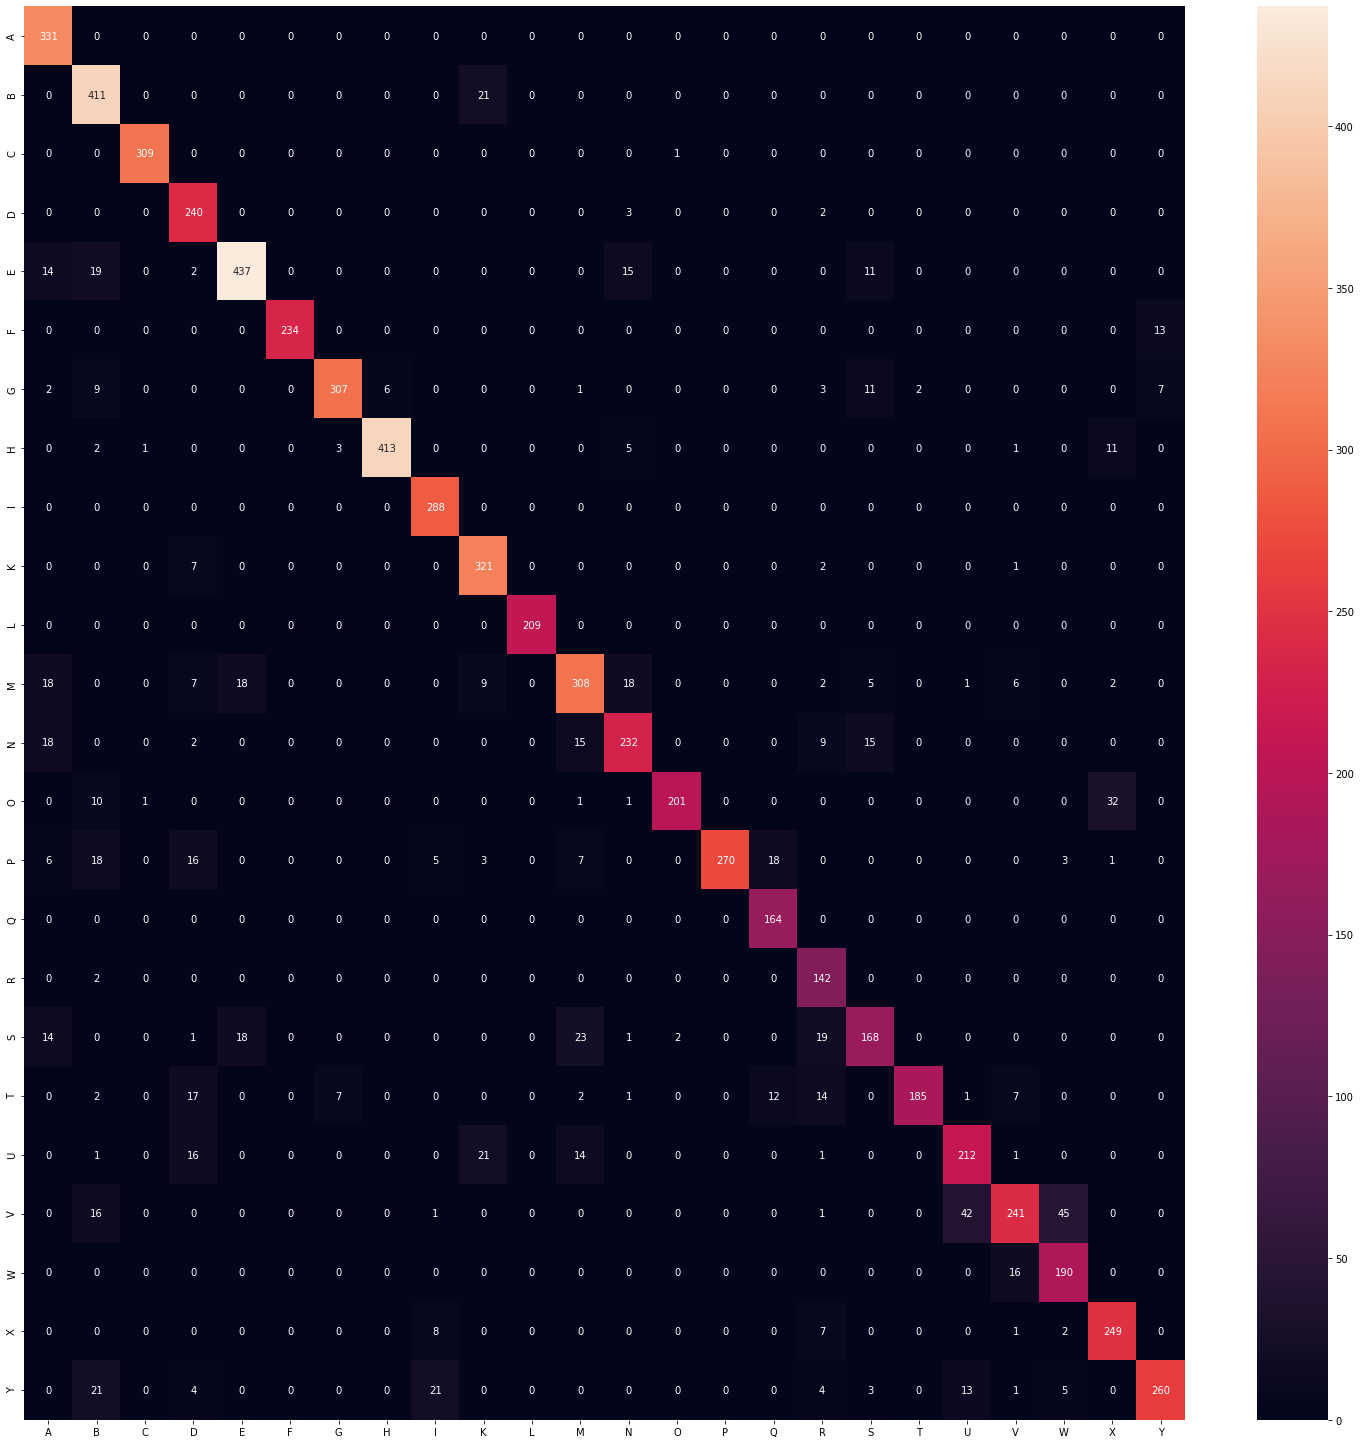

Evaluating model for k=9


d:\sign-language-hand-gesture-recognition\venv_second\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


              precision    recall  f1-score   support

           A       0.82      1.00      0.90       331
           B       0.79      0.95      0.87       432
           C       0.99      1.00      1.00       310
           D       0.77      0.98      0.86       245
           E       0.92      0.86      0.89       498
           F       1.00      0.94      0.97       247
           G       0.97      0.88      0.92       348
           H       0.98      0.94      0.96       436
           I       0.89      1.00      0.94       288
           K       0.84      0.97      0.90       331
           L       1.00      1.00      1.00       209
           M       0.80      0.77      0.79       394
           N       0.82      0.80      0.81       291
           O       0.99      0.80      0.89       246
           P       1.00      0.78      0.88       347
           Q       0.85      1.00      0.92       164
           R       0.68      0.98      0.81       144
           S       0.78    

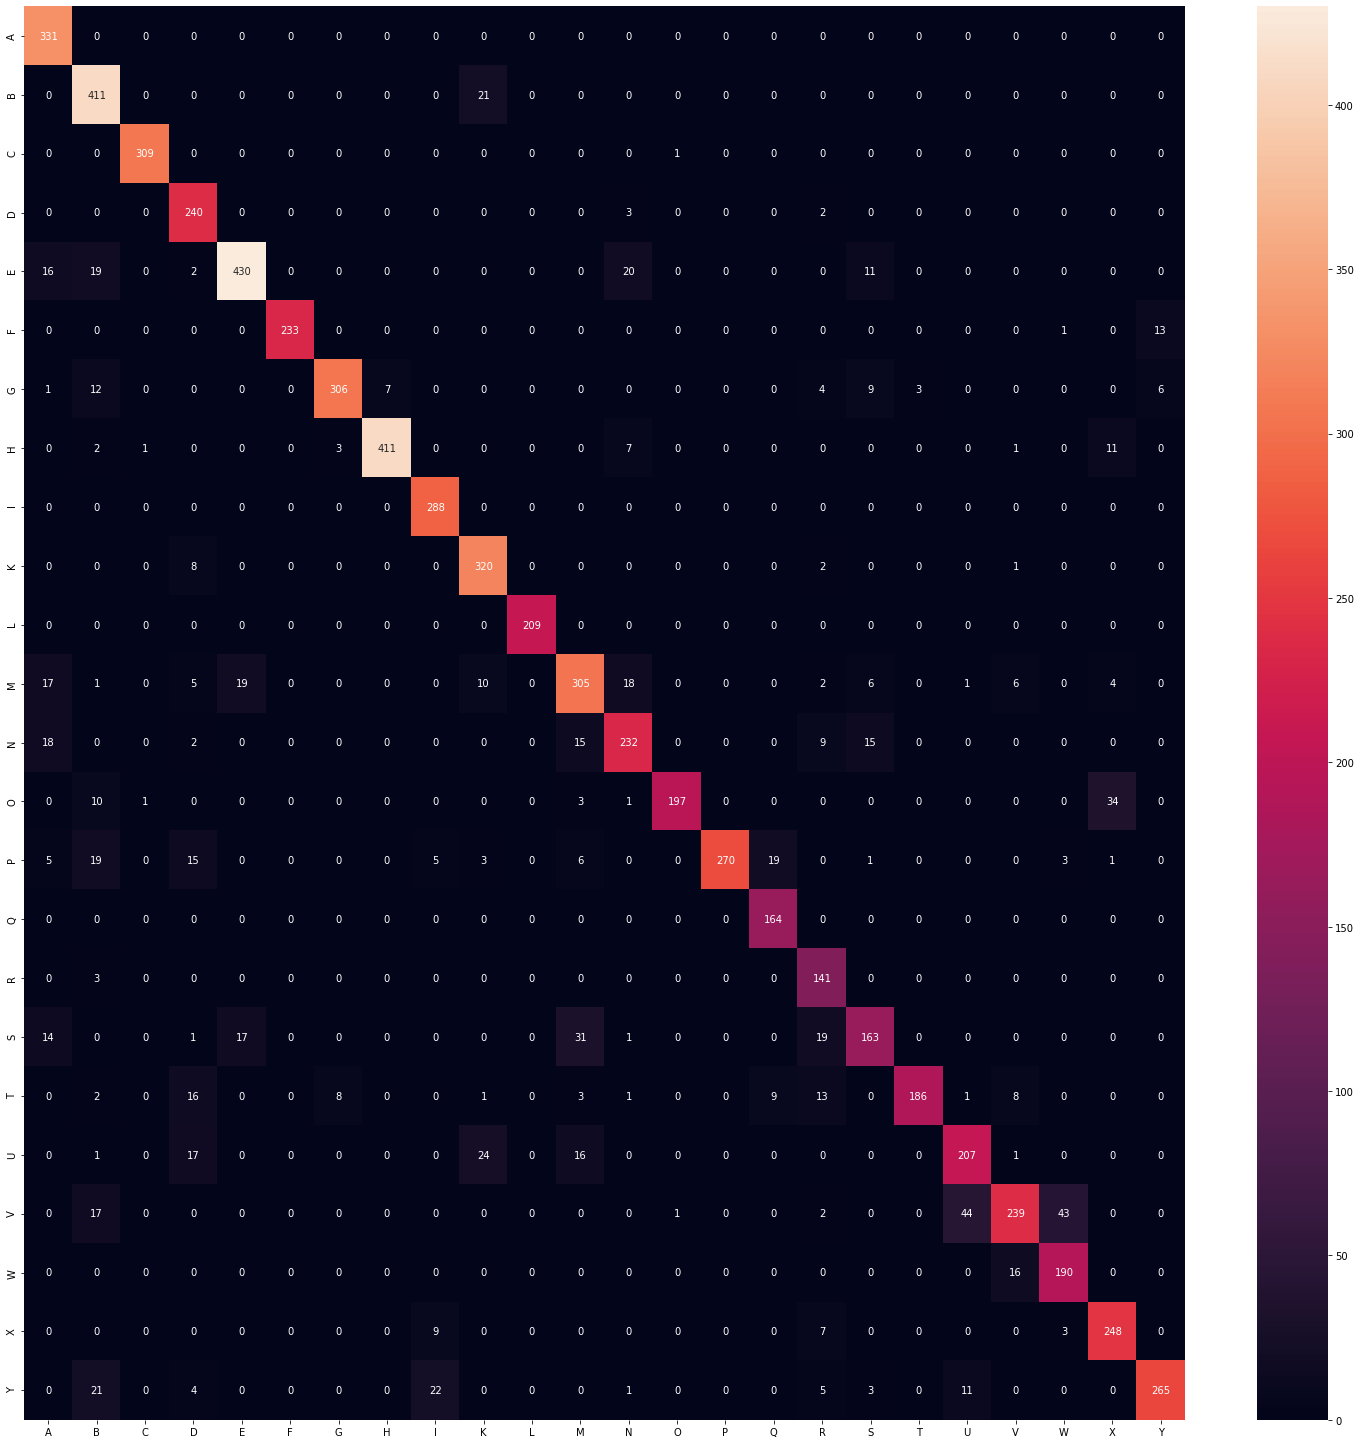

In [61]:
iterate_through('mahalanobis')

## SVM tests

### Linear kernel

              precision    recall  f1-score   support

           A       0.89      0.98      0.93       331
           B       0.96      0.88      0.92       432
           C       1.00      1.00      1.00       310
           D       0.98      0.81      0.89       245
           E       0.87      0.95      0.91       498
           F       0.93      1.00      0.96       247
           G       1.00      0.82      0.90       348
           H       0.91      1.00      0.95       436
           I       0.94      0.93      0.94       288
           K       0.87      0.93      0.90       331
           L       0.91      1.00      0.95       209
           M       0.81      0.76      0.78       394
           N       0.76      0.70      0.73       291
           O       1.00      1.00      1.00       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.64      0.95      0.76       144
           S       0.67    

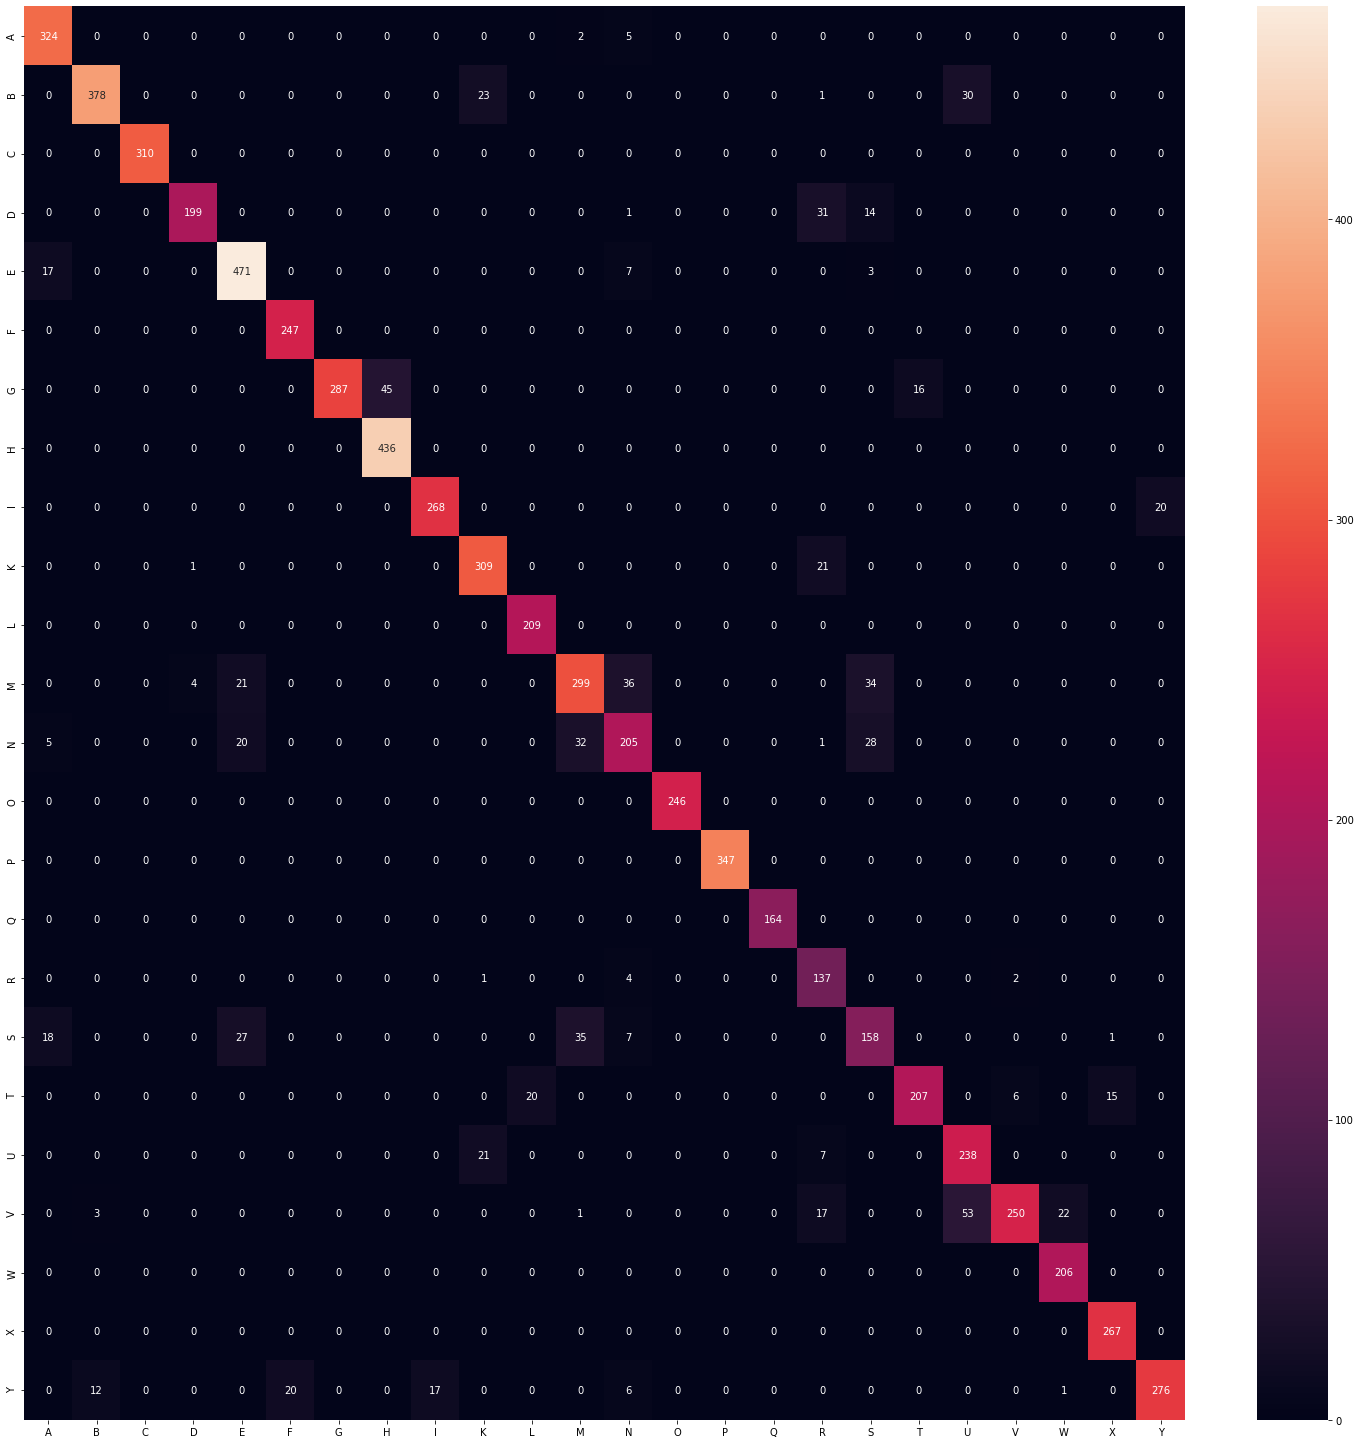

In [47]:
evaluate_model(SVC(kernel="linear"))

### Polynomial kernel

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       331
           B       1.00      0.95      0.98       432
           C       1.00      1.00      1.00       310
           D       0.99      0.94      0.96       245
           E       0.94      1.00      0.97       498
           F       0.94      1.00      0.97       247
           G       1.00      0.92      0.96       348
           H       0.96      1.00      0.98       436
           I       1.00      1.00      1.00       288
           K       0.93      0.95      0.94       331
           L       0.92      1.00      0.96       209
           M       0.90      0.91      0.91       394
           N       0.88      0.81      0.84       291
           O       1.00      1.00      1.00       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.88      1.00      0.94       144
           S       0.87    

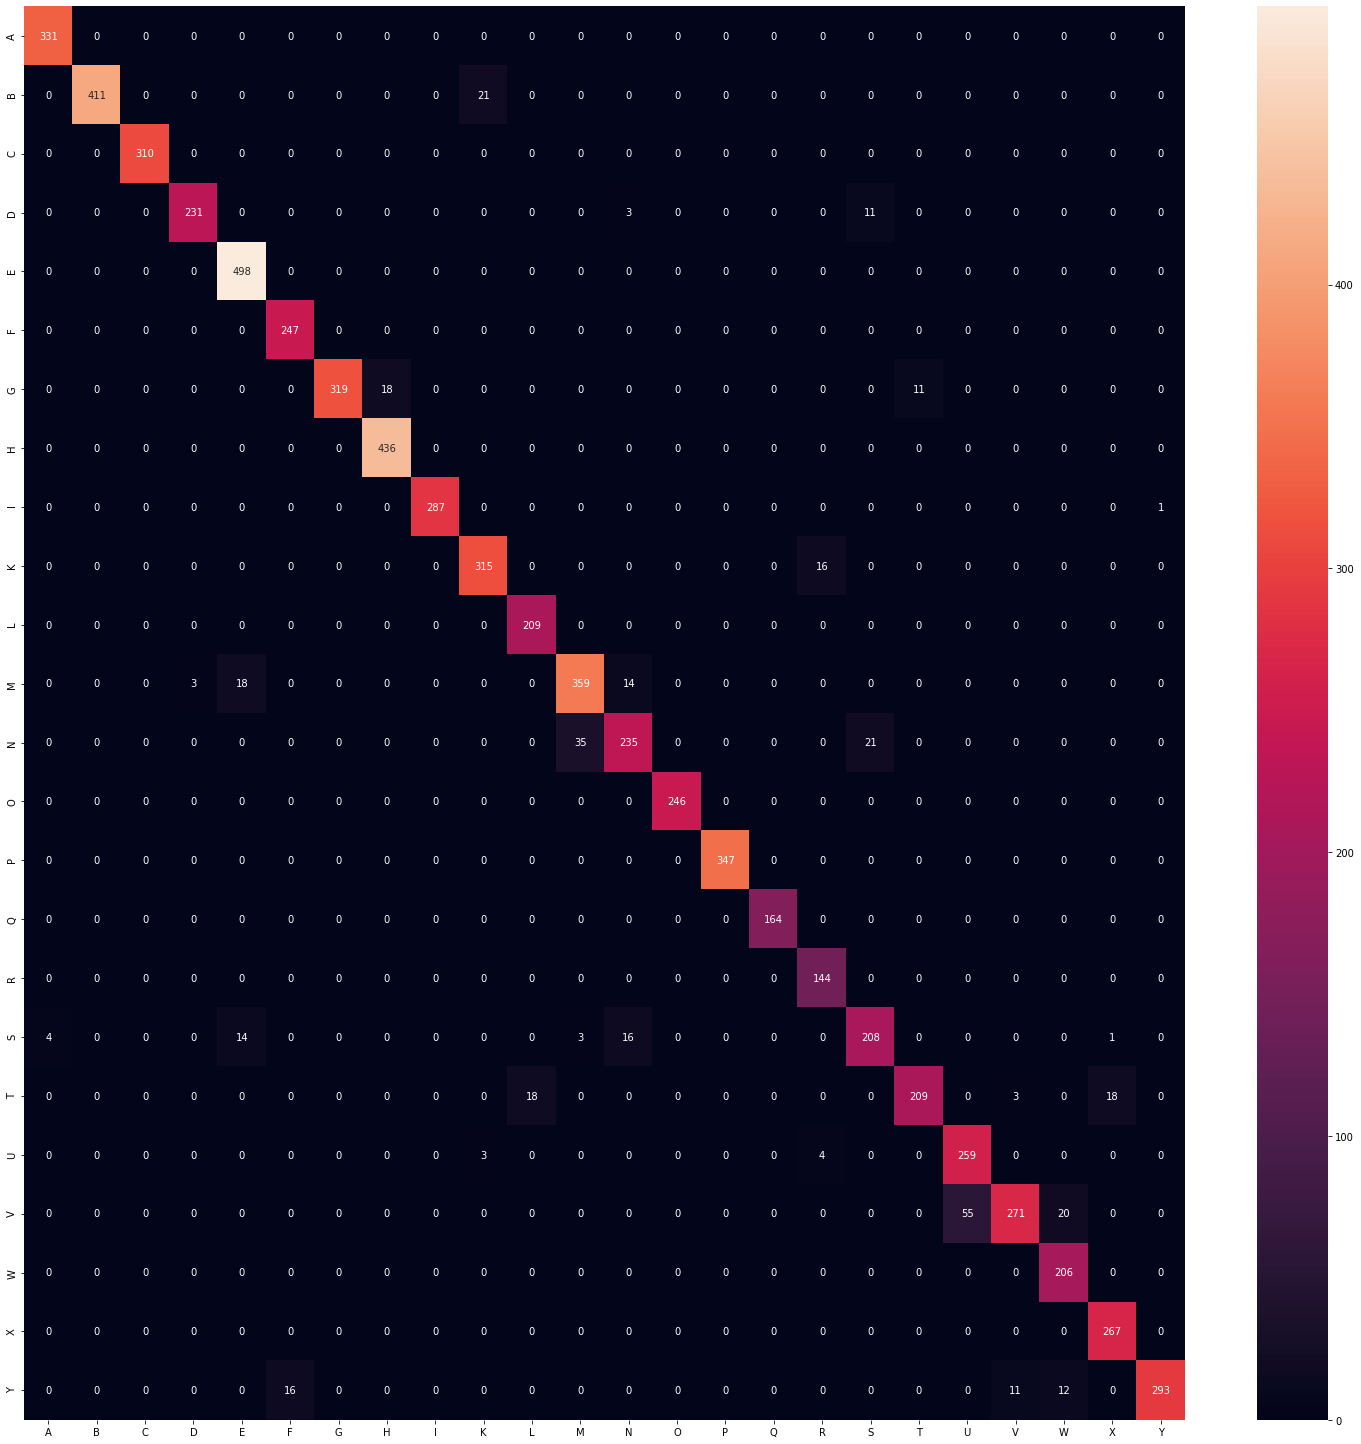

In [58]:
evaluate_model(SVC(kernel="poly"))

### Radial basis function kernel

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       331
           B       1.00      0.95      0.98       432
           C       1.00      1.00      1.00       310
           D       0.99      0.95      0.97       245
           E       0.94      1.00      0.97       498
           F       0.94      1.00      0.97       247
           G       1.00      0.91      0.95       348
           H       0.97      1.00      0.98       436
           I       1.00      0.99      0.99       288
           K       0.89      0.95      0.92       331
           L       0.93      1.00      0.96       209
           M       0.85      0.91      0.88       394
           N       0.88      0.75      0.81       291
           O       1.00      1.00      1.00       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       0.87      1.00      0.93       144
           S       0.85    

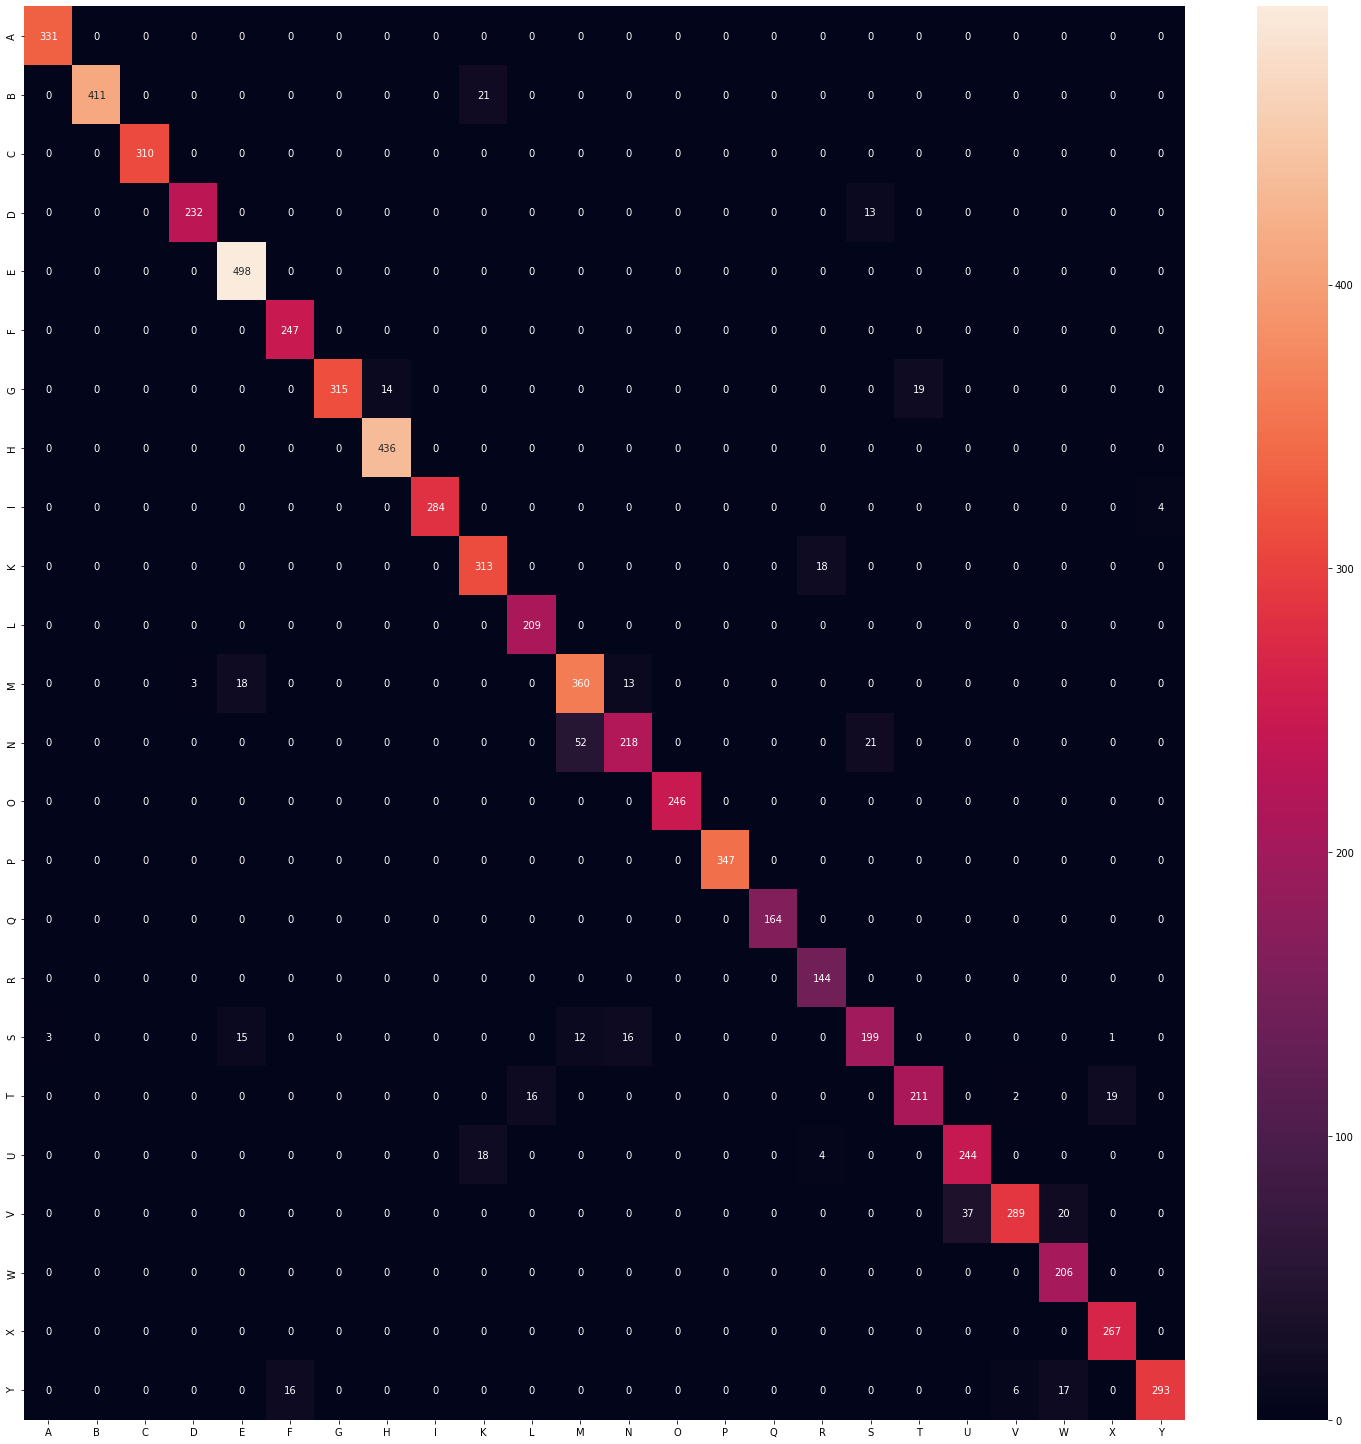

In [49]:
evaluate_model(SVC(kernel="rbf"))

### Sigmoid kernel

              precision    recall  f1-score   support

           A       0.73      0.93      0.82       331
           B       0.69      0.62      0.65       432
           C       0.91      0.93      0.92       310
           D       0.62      0.67      0.64       245
           E       0.71      0.72      0.72       498
           F       0.98      0.83      0.90       247
           G       0.57      0.64      0.60       348
           H       0.81      0.75      0.78       436
           I       0.92      0.68      0.78       288
           K       0.48      0.68      0.57       331
           L       0.90      1.00      0.95       209
           M       0.71      0.56      0.62       394
           N       0.44      0.51      0.48       291
           O       0.88      0.83      0.85       246
           P       0.91      0.93      0.92       347
           Q       0.95      0.65      0.77       164
           R       0.24      0.59      0.34       144
           S       0.42    

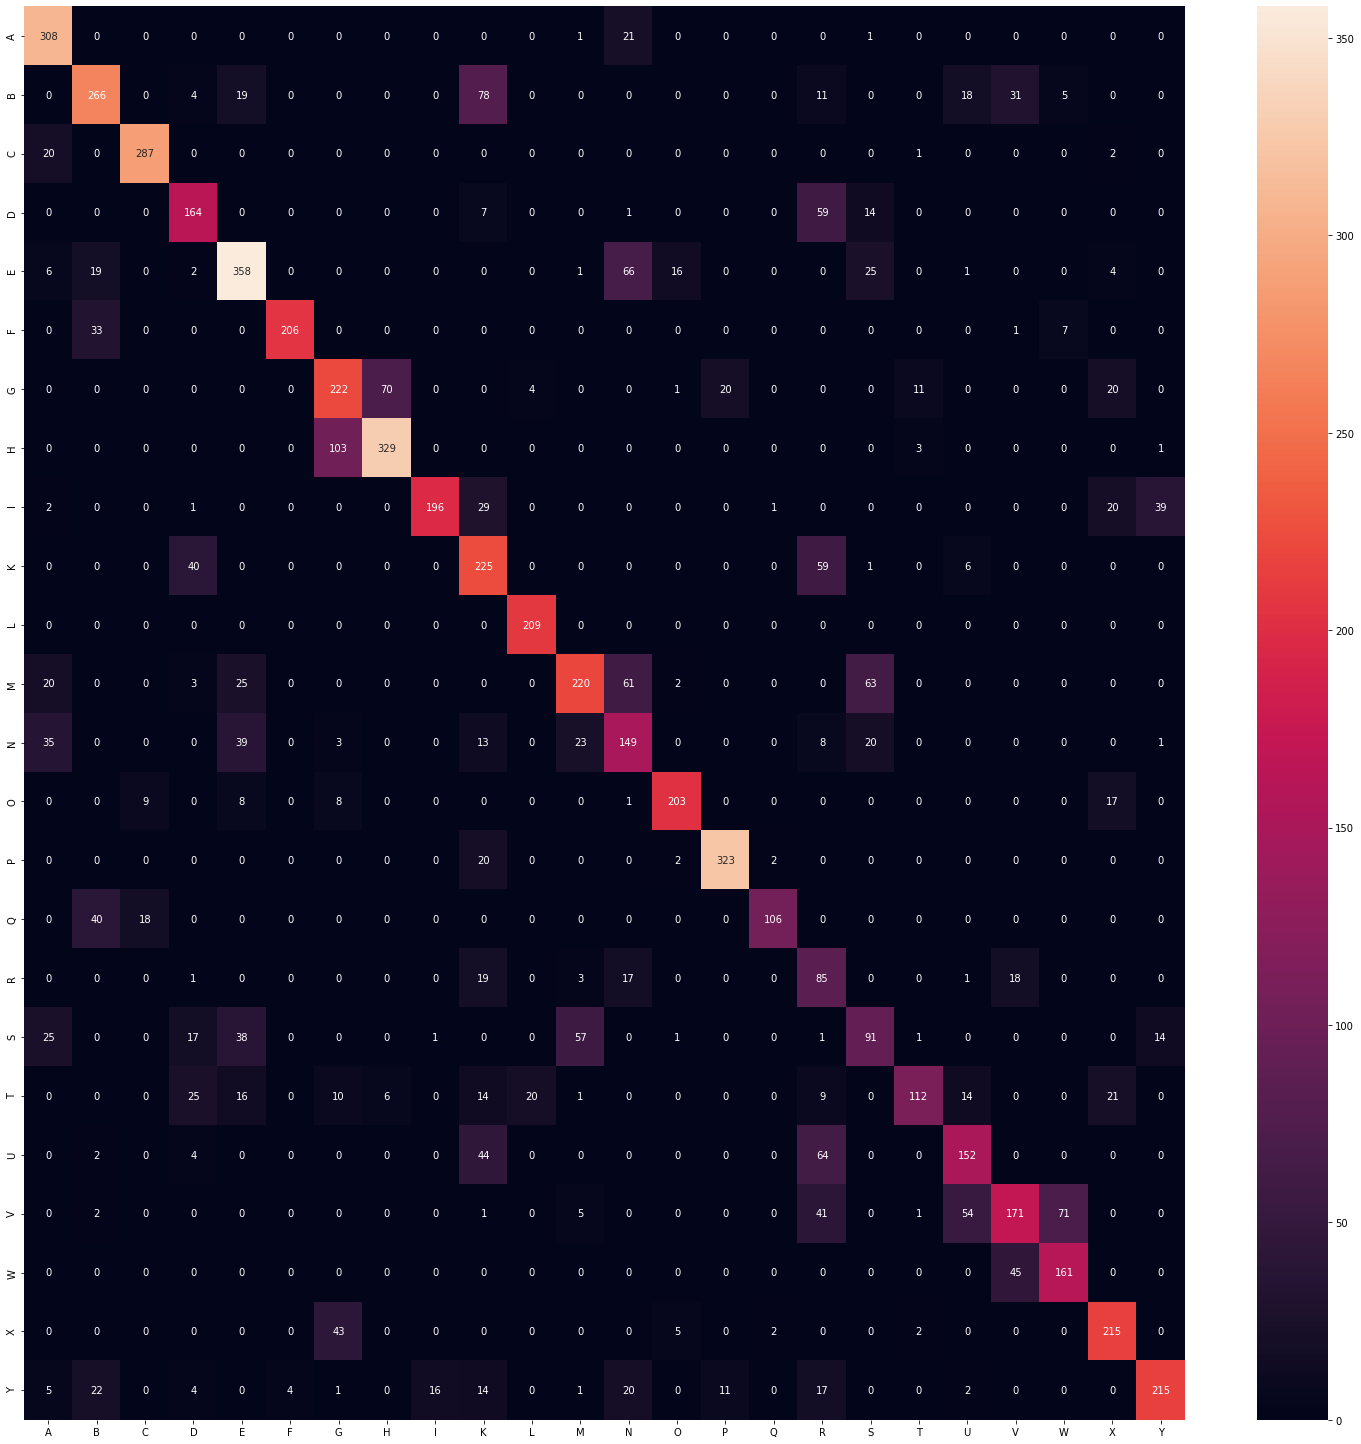

In [50]:
evaluate_model(SVC(kernel="sigmoid"))

## CNN tests

### First model

In [3]:
def create_first_model():
    model = tensorflow.keras.models.Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D())
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(26, activation="softmax"))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

### Second model

In [4]:
def create_second_model():
    model = tensorflow.keras.models.Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(26, activation="softmax"))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

Preprocessing data for cnn

In [5]:
X_train = main.preprocess_cnn(X_train)
X_test = main.preprocess_cnn(X_test)

Function for training and evaluating model

In [11]:
def evaluate_cnn_model(learning_model):
    train_data_generator, validation_generator = main.create_image_generators(X_train)
    history = learning_model.fit(train_data_generator.flow(X_train, y_train),
                        validation_data=validation_generator.flow(X_test, y_test), epochs=10)
    y_pred = np.argmax(learning_model.predict(X_test), axis=-1)
    print(classification_report(y_test, y_pred, target_names=possible_classes))
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(26,26))
    sns.heatmap(conf_matrix, annot=True, xticklabels=possible_classes,
                yticklabels=possible_classes, ax=ax, fmt='g')
    plt.show()
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    epoch_count = range(1, len(train_loss) + 1)
    plt.plot(epoch_count, train_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
    plt.plot(epoch_count, train_accuracy, 'g--')
    plt.plot(epoch_count, test_accuracy, 'y-')
    plt.legend(['Training accuracy', 'Testing accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show();

### Evaluating first model

k
Epoch 1/10
858/858 [==============================] - 18s 20ms/step - loss: 2.1936 - accuracy: 0.3405 - val_loss: 0.4095 - val_accuracy: 0.8776
Epoch 2/10
858/858 [==============================] - 17s 19ms/step - loss: 0.5431 - accuracy: 0.8238 - val_loss: 0.1961 - val_accuracy: 0.9359
Epoch 3/10
858/858 [==============================] - 17s 20ms/step - loss: 0.3009 - accuracy: 0.9034 - val_loss: 0.0893 - val_accuracy: 0.9738
Epoch 4/10
858/858 [==============================] - 23s 27ms/step - loss: 0.1878 - accuracy: 0.9389 - val_loss: 0.0611 - val_accuracy: 0.9777
Epoch 5/10
858/858 [==============================] - 23s 27ms/step - loss: 0.1372 - accuracy: 0.9548 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 6/10
858/858 [==============================] - 23s 27ms/step - loss: 0.1045 - accuracy: 0.9675 - val_loss: 0.0278 - val_accuracy: 0.9900
Epoch 7/10
858/858 [==============================] - 23s 27ms/step - loss: 0.0898 - accuracy: 0.9713 - val_loss: 0.0477 - val_accurac

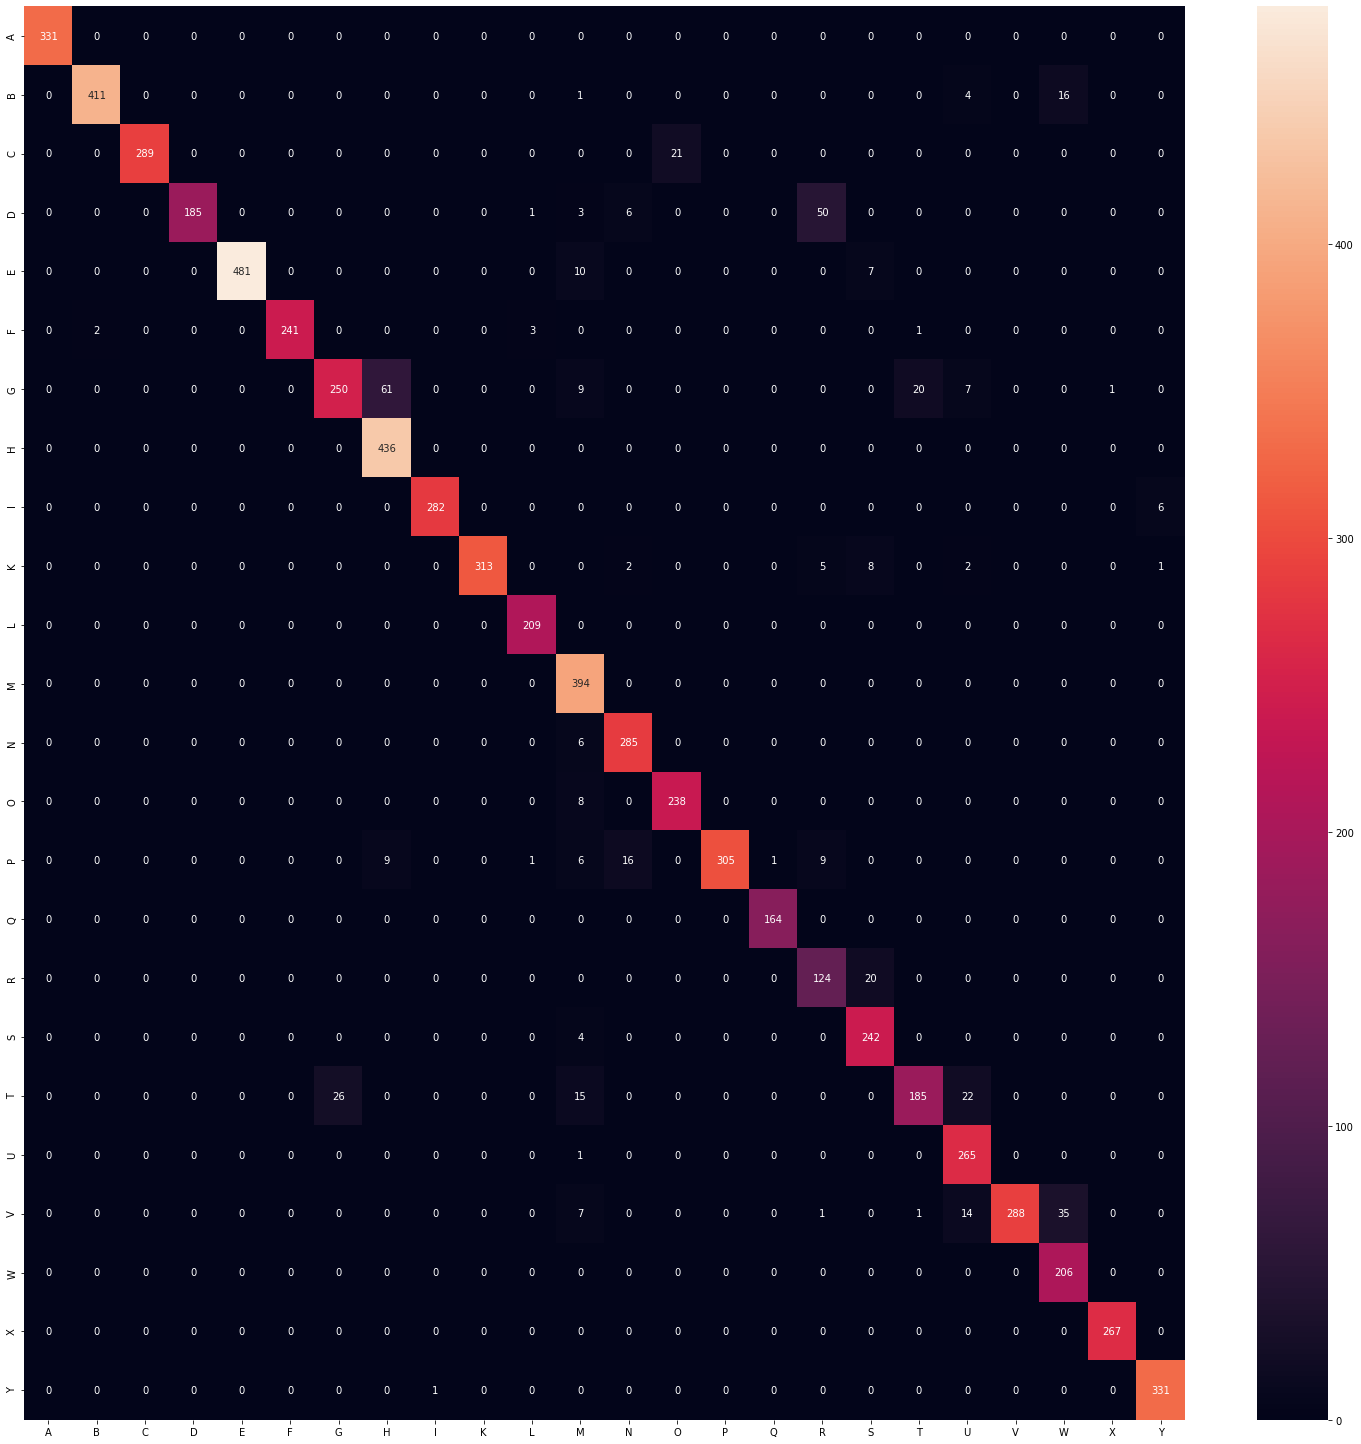

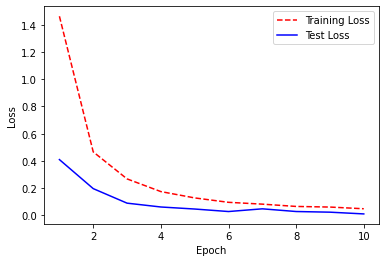

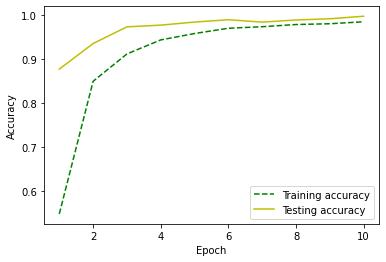

In [12]:
evaluate_cnn_model(create_first_model())

### Evaluating second model

k
Epoch 1/10
858/858 [==============================] - 36s 41ms/step - loss: 2.3598 - accuracy: 0.2659 - val_loss: 0.4030 - val_accuracy: 0.8727
Epoch 2/10
858/858 [==============================] - 28s 32ms/step - loss: 0.4999 - accuracy: 0.8243 - val_loss: 0.1466 - val_accuracy: 0.9442
Epoch 3/10
858/858 [==============================] - 26s 30ms/step - loss: 0.2382 - accuracy: 0.9180 - val_loss: 0.0843 - val_accuracy: 0.9693
Epoch 4/10
858/858 [==============================] - 24s 28ms/step - loss: 0.1707 - accuracy: 0.9424 - val_loss: 0.0349 - val_accuracy: 0.9880
Epoch 5/10
858/858 [==============================] - 25s 29ms/step - loss: 0.1188 - accuracy: 0.9597 - val_loss: 0.0330 - val_accuracy: 0.9880
Epoch 6/10
858/858 [==============================] - 28s 33ms/step - loss: 0.0982 - accuracy: 0.9673 - val_loss: 0.0549 - val_accuracy: 0.9828
Epoch 7/10
858/858 [==============================] - 23s 27ms/step - loss: 0.0822 - accuracy: 0.9703 - val_loss: 0.0316 - val_accurac

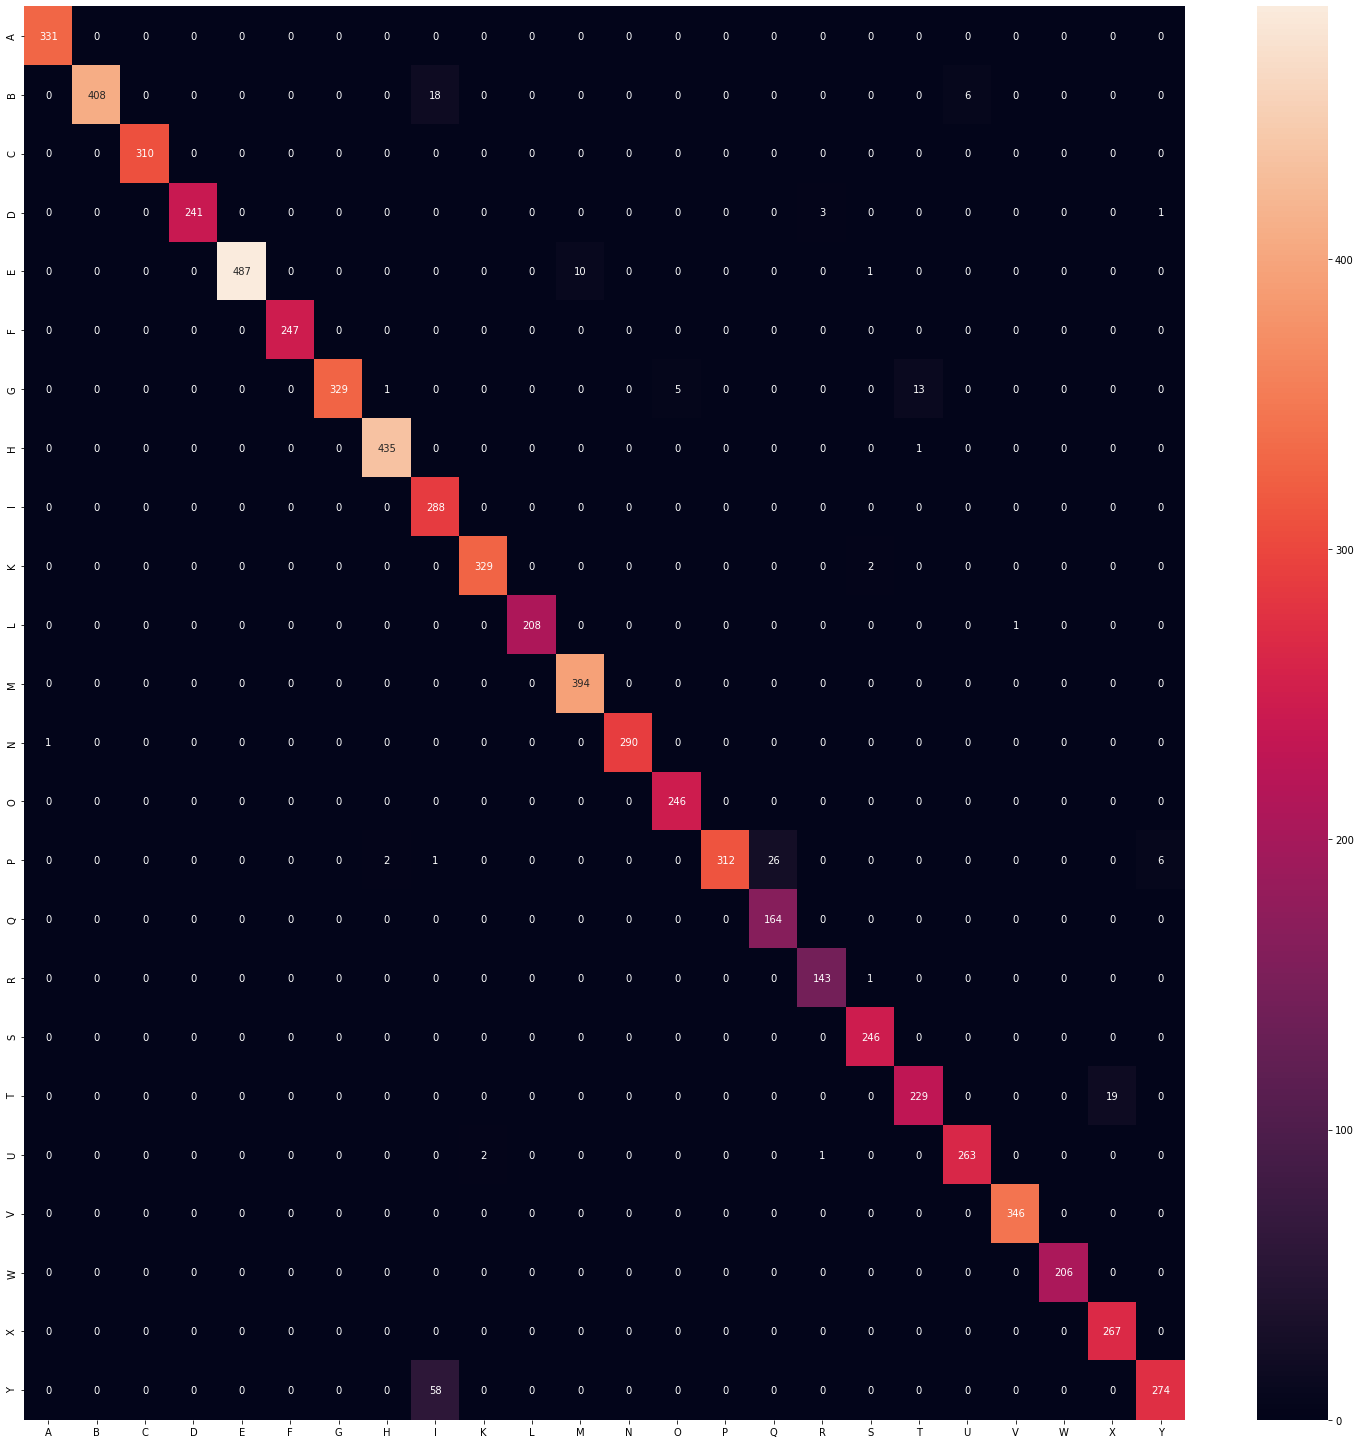

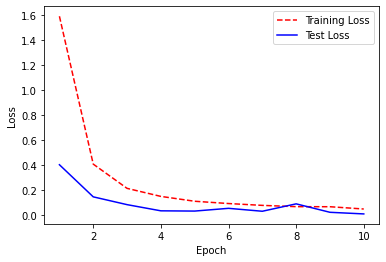

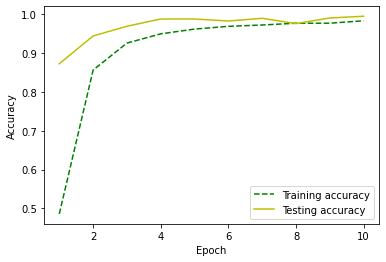

In [13]:
evaluate_cnn_model(create_second_model())